In [17]:
import json
import statistics
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import fcluster
from scipy.spatial.distance import pdist, squareform
import sklearn.cluster as cluster
import time
import scipy
import seaborn as sns
import random
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha': 0.25, 's':80, 'linewidths':0}

# set up type of service

In [18]:
# user input
user_input = 'Restaurants'
# u_id = 'McLqvYLBQoCFQikU9dC4cQ'

# read in business file, compose business categories, business rating on category and business postal code dictionary

In [19]:
# initialize business data
bcmap = {}
with open('./business.json','r') as bf:
    for line in bf:
        l = json.loads(line)
        
        key = l['business_id']
        #Business Category Dictionary
        category = l['categories']
        bcmap[key] = category

# generate top categories
category = {}
for i in bcmap:
    if user_input in bcmap[i]:
        for j in bcmap[i]:
            if j not in category:
                category[j] = 1
            else:
                category[j] += 1
top_cate = sorted(category.items(), key=lambda x:(-x[1]))[1:21]
tc = []
for i in top_cate:
    tc.append(i[0])
    
# initialize business data   
location = {}
bcrmap = {}
business_name = {}
with open('./business.json','r') as bf:
    for line in bf:
        l = json.loads(line)
        key = l['business_id']
        category = l['categories']
        
        # Business City Dictionary
        city = l['city']
        location[key] = city
        
        # Business -> Category -> Star Dictionary
        stars = l['stars']
        valid = False
        number_of_tc = 0
        if city not in bcrmap:
            bcrmap[city] = {}
        if key not in bcrmap[city]:
            bcrmap[city][key] = {}
        for i in category:
            if i in tc:
                number_of_tc += 1
                valid = True
                bcrmap[city][key].setdefault(i,[]).append(stars)
        if not valid or number_of_tc <3:
            del bcrmap[city][key]
            
            
        # Business name -> Address Dictionary
        name = l['name'] +','  + l['address'] +','  + l['city'] +',' + l['state']
        business_name[key] = name
        

# read in review file and generate user to category to rating map

In [20]:
# initialize user review data
# User -> Categories -> Stars
ucrmap = {}
test_urcmap = {}
user_rating = {}
with open('./review.json', 'r') as rv:
    for line in rv:
        n1 = json.loads(line)
        okey = n1['user_id']
        year = n1['date']
        ikeys = bcmap[n1['business_id']]
        bid = n1['business_id']
        value = n1['stars']
        city = location[bid]
        if city not in user_rating:
            user_rating[city] = {}
        user_rating[city].setdefault(okey, []).append(value)
        if city not in ucrmap:
            ucrmap[city]  = {}
        if city not in test_urcmap:
            test_urcmap[city]  = {}
        if int(n1['date'].split('-')[0]) < 2016:
            if okey not in ucrmap[city]:
                ucrmap[city][okey] = {}
            for ikey in ikeys:
                if ikey in tc:
                    ucrmap[city][okey].setdefault(ikey, []).append(value)
        else:
            if okey not in test_urcmap:
                test_urcmap[city][okey] = {}
            test_urcmap[city][okey][bid] = value

In [21]:
listCity = {}
for i in ucrmap:
    if i in bcrmap:
        listCity[i] = {}
        listCity[i]['user'] = len(ucrmap[i])
        listCity[i]['business'] = len(bcrmap[i])

In [22]:
len(listCity)

1010

In [23]:
sorted_by_business = sorted(listCity.items(), key=lambda x: -x[1]['business'])
sorted_by_business

[('Las Vegas', {'business': 1477, 'user': 290813}),
 ('Toronto', {'business': 1319, 'user': 53905}),
 ('Phoenix', {'business': 981, 'user': 114505}),
 ('Charlotte', {'business': 732, 'user': 39523}),
 ('Pittsburgh', {'business': 663, 'user': 31715}),
 ('Scottsdale', {'business': 515, 'user': 71454}),
 ('Montréal', {'business': 496, 'user': 21535}),
 ('Cleveland', {'business': 396, 'user': 20653}),
 ('Madison', {'business': 354, 'user': 17121}),
 ('Edinburgh', {'business': 323, 'user': 6869}),
 ('Tempe', {'business': 270, 'user': 44293}),
 ('Mesa', {'business': 266, 'user': 32842}),
 ('Henderson', {'business': 231, 'user': 37913}),
 ('Stuttgart', {'business': 226, 'user': 7877}),
 ('Chandler', {'business': 214, 'user': 30060}),
 ('Mississauga', {'business': 187, 'user': 8450}),
 ('Glendale', {'business': 165, 'user': 21017}),
 ('Gilbert', {'business': 157, 'user': 23918}),
 ('Champaign', {'business': 94, 'user': 6173}),
 ('Peoria', {'business': 93, 'user': 12282}),
 ('Markham', {'busine

In [24]:
sorted_by_user = sorted(listCity.items(), key=lambda x: -x[1]['user'])
sorted_by_user

[('Las Vegas', {'business': 1477, 'user': 290813}),
 ('Phoenix', {'business': 981, 'user': 114505}),
 ('Scottsdale', {'business': 515, 'user': 71454}),
 ('Toronto', {'business': 1319, 'user': 53905}),
 ('Tempe', {'business': 270, 'user': 44293}),
 ('Charlotte', {'business': 732, 'user': 39523}),
 ('Henderson', {'business': 231, 'user': 37913}),
 ('Mesa', {'business': 266, 'user': 32842}),
 ('Pittsburgh', {'business': 663, 'user': 31715}),
 ('Chandler', {'business': 214, 'user': 30060}),
 ('Gilbert', {'business': 157, 'user': 23918}),
 ('Montréal', {'business': 496, 'user': 21535}),
 ('Glendale', {'business': 165, 'user': 21017}),
 ('Cleveland', {'business': 396, 'user': 20653}),
 ('Madison', {'business': 354, 'user': 17121}),
 ('Peoria', {'business': 93, 'user': 12282}),
 ('North Las Vegas', {'business': 67, 'user': 10471}),
 ('Mississauga', {'business': 187, 'user': 8450}),
 ('Stuttgart', {'business': 226, 'user': 7877}),
 ('Edinburgh', {'business': 323, 'user': 6869}),
 ('Surprise', 

In [25]:
list_city = [ x[0] for x in sorted_by_business]

In [26]:
list_city

['Las Vegas',
 'Toronto',
 'Phoenix',
 'Charlotte',
 'Pittsburgh',
 'Scottsdale',
 'Montréal',
 'Cleveland',
 'Madison',
 'Edinburgh',
 'Tempe',
 'Mesa',
 'Henderson',
 'Stuttgart',
 'Chandler',
 'Mississauga',
 'Glendale',
 'Gilbert',
 'Champaign',
 'Peoria',
 'Markham',
 'Concord',
 'Brampton',
 'Richmond Hill',
 'Vaughan',
 'North Las Vegas',
 'North York',
 'Lakewood',
 'Oakville',
 'Surprise',
 'Fort Mill',
 'Mentor',
 'Etobicoke',
 'Scarborough',
 'Huntersville',
 'Westlake',
 'Matthews',
 'Gastonia',
 'Cuyahoga Falls',
 'Strongsville',
 'Goodyear',
 'Aurora',
 'North Olmsted',
 'Cornelius',
 'Avondale',
 'Willoughby',
 'Newmarket',
 'Kent',
 'Monroeville',
 'Medina',
 'Avon',
 'Laval',
 'Middleton',
 'Urbana',
 'Solon',
 'Cave Creek',
 'Whitby',
 'Parma',
 'Ajax',
 'Rocky River',
 'Montreal',
 'Hudson',
 'Cleveland Heights',
 'Ludwigsburg',
 'Fountain Hills',
 'Stow',
 'Coraopolis',
 'Verona',
 'Elyria',
 'Woodbridge',
 'Bridgeville',
 'Sun Prairie',
 'Thornhill',
 'Irwin',
 'Av

In [27]:
def recommend_based_on_state(state):
    print('============================================')
    print('Recommendation info summary for : ', state)

    City_of_Data = state
   
    # pre-process data: build up user and business data set based on state
    filter_user = {}
    valid_user = {}
    valid_test_user = {}
    for i in user_rating[City_of_Data]:
        if len(user_rating[City_of_Data][i]) >= 20:
            filter_user[i] = len(user_rating[City_of_Data][i])
    raw = sorted(filter_user.items(), key=lambda x:-x[1])
    valid_list = []
    for k, v in raw:
        if k in ucrmap[City_of_Data] and k in test_urcmap[City_of_Data]:
            valid_list.append(k)
            valid_user[k] = ucrmap[City_of_Data][k]
            valid_test_user[k] = test_urcmap[City_of_Data][k]
            
    print('number of valid user: ', len(valid_user))
    print('number of valid test user: ', len(valid_user))
    
    #generate business category dict with pure vector
    def generate_nbcrmap(data):
        for business in data:
            for k, v in data[business].items():
                data[business][k] = statistics.mean(v)

        for business in data:
            for i in tc:
                if i not in data[business]:
                    data[business][i] = 3.12

        nbcrmap = {}
        for k, v in data.items():
            nbcrmap[k] = []
            value = []
            for i in tc:
                value.append(v[i])
            nbcrmap[k] = value
        return nbcrmap

    nbcrmp = generate_nbcrmap(bcrmap[City_of_Data])
    
    # Compose user category vector
    def generate_nucrmap(data):
        for user in data:
            for cate, value in data[user].items():
                data[user][cate] = statistics.mean(value)
        for user in data:
            for i in tc:
                if i not in data[user]:
                    data[user][i] = 3.12

        nucrmap = {}
        for k, v in data.items():
            nucrmap[k] = []
            value = []
            for i in tc:
                value.append(v[i])
            nucrmap[k] = value
        return nucrmap

    nucrmap = generate_nucrmap(valid_user)
    
    data = nucrmap
    listV = list(data.values())
    listK = list(data.keys())
    
    # Agglomerative clustering using scipy
    Z = scipy.cluster.hierarchy.linkage(listV[:300], method='average')
    plt.clf()
    fig = plt.figure(figsize=(20, 16), dpi=100, facecolor='w', edgecolor='k')
    dd = scipy.cluster.hierarchy.dendrogram(Z)
    plt.savefig('{}.pdf'.format('average'))
    plt.show()
    
#     c, coph_dists = scipy.cluster.hierarchy.cophenet(Z, pdist(listV))
#     print("c, coph_dists = cophenet(Z, pdist(X)); c is ideally close to one, c="+repr(c))
    
    #agglomerative clustering using sklearn 
    data1 = []
    for k,v in nucrmap.items():
        data1.append(v)
    np.save('123', np.array(data1))
    data1 = np.load('123.npy')

    # get number of clusters from above plot and generate clusters dictionary
    model = cluster.AgglomerativeClustering(linkage='average', n_clusters=11)
    result = model.fit_predict(listV)
    clusters = {}
    for i in range(len(result)):
        k = result[i]
        v = data1[i]
        clusters.setdefault(k, []).append(v)

    # Average Vector for each cluster generated above

    average_vector = {}
    for i in list(clusters.keys()):
        average_vector[i] = np.mean(clusters[i], axis=0)

    def generate_recommendatioin(uid):
        index = listK.index(uid)
        uvector = average_vector[result[index]]
        r = {}
        for i in nbcrmp:
            r[i] = np.inner(uvector, nbcrmp[i])
        top_business = sorted(r.items(), key=lambda x:(-x[1]))[1:100]
        return [k for k,v in top_business]
    def cacluate_hr(uid, bids):
        score = 0
        count = 0
        for bid in bids:
            if bid in valid_test_user[uid]:
                count += 1
                if valid_test_user[uid][bid] > 3.7:
                    score += 1
                if valid_test_user[uid][bid] < 2.6:
                    score -= 1
        return np.array([score, count])
    
    def calculate_ndcg(uid, bids):
        gain = 0
        ind_list = []
        for i in range(len(bids)):
            bid = bids[i]
            if bid in valid_test_user[uid]:
                ind_list.append(i+1)
                gain += valid_test_user[uid][bid]/(i+1)
        idcg = 0
        for i in ind_list:
            idcg += 5/i
        if idcg == 0:
            return 0
        return gain/idcg

    def evaluate(list_test):
        hr = np.array([0,0])
        for uid in list_test:
            recs = generate_recommendatioin(uid)
            tmp = cacluate_hr(uid, recs)
            hr += tmp
        print('Hit Ratio: ', hr[0]/hr[1])
        print('============================================')
        print('\n\n\n\n')
        return hr[0]/hr[1]
        
    return evaluate(valid_list)

Recommendation info summary for :  Las Vegas
number of valid user:  5896
number of valid test user:  5896


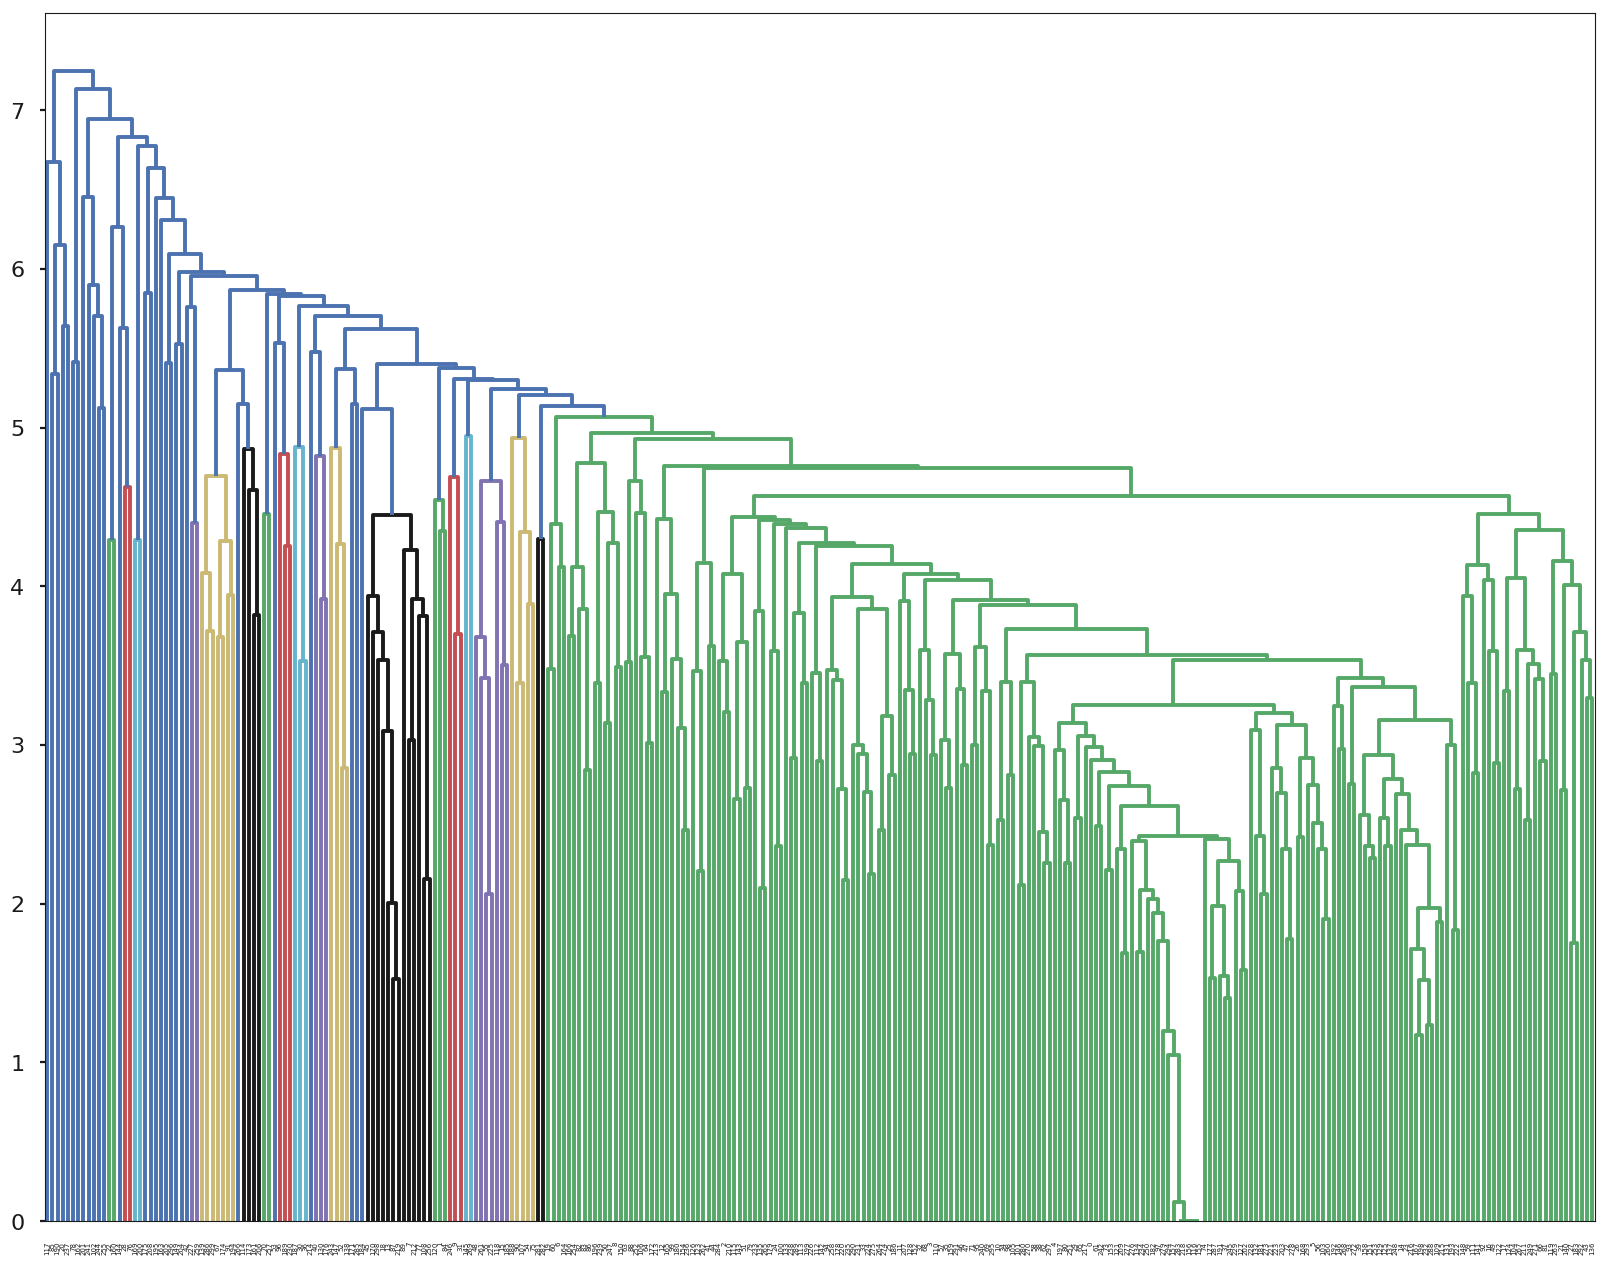

Hit Ratio:  0.598484848485





Recommendation info summary for :  Toronto
number of valid user:  2104
number of valid test user:  2104


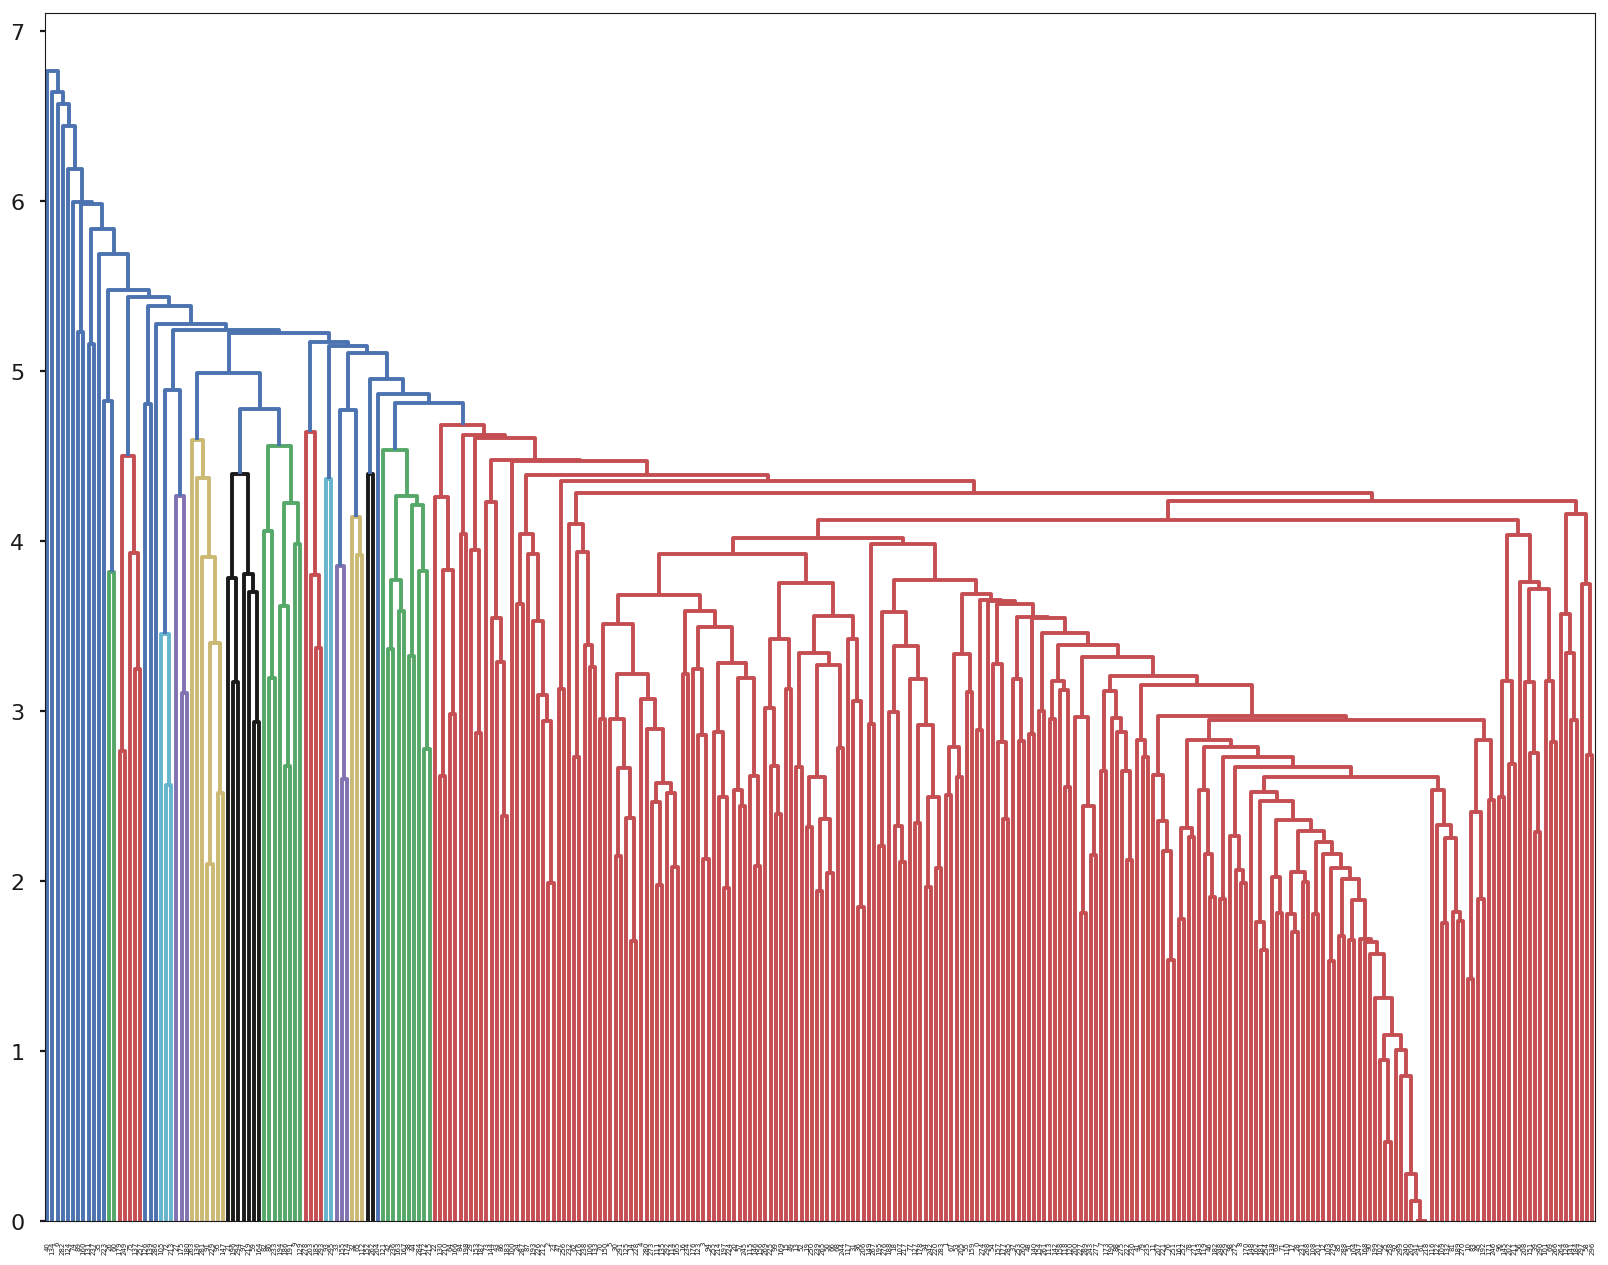

Hit Ratio:  0.714285714286





Recommendation info summary for :  Phoenix
number of valid user:  1963
number of valid test user:  1963


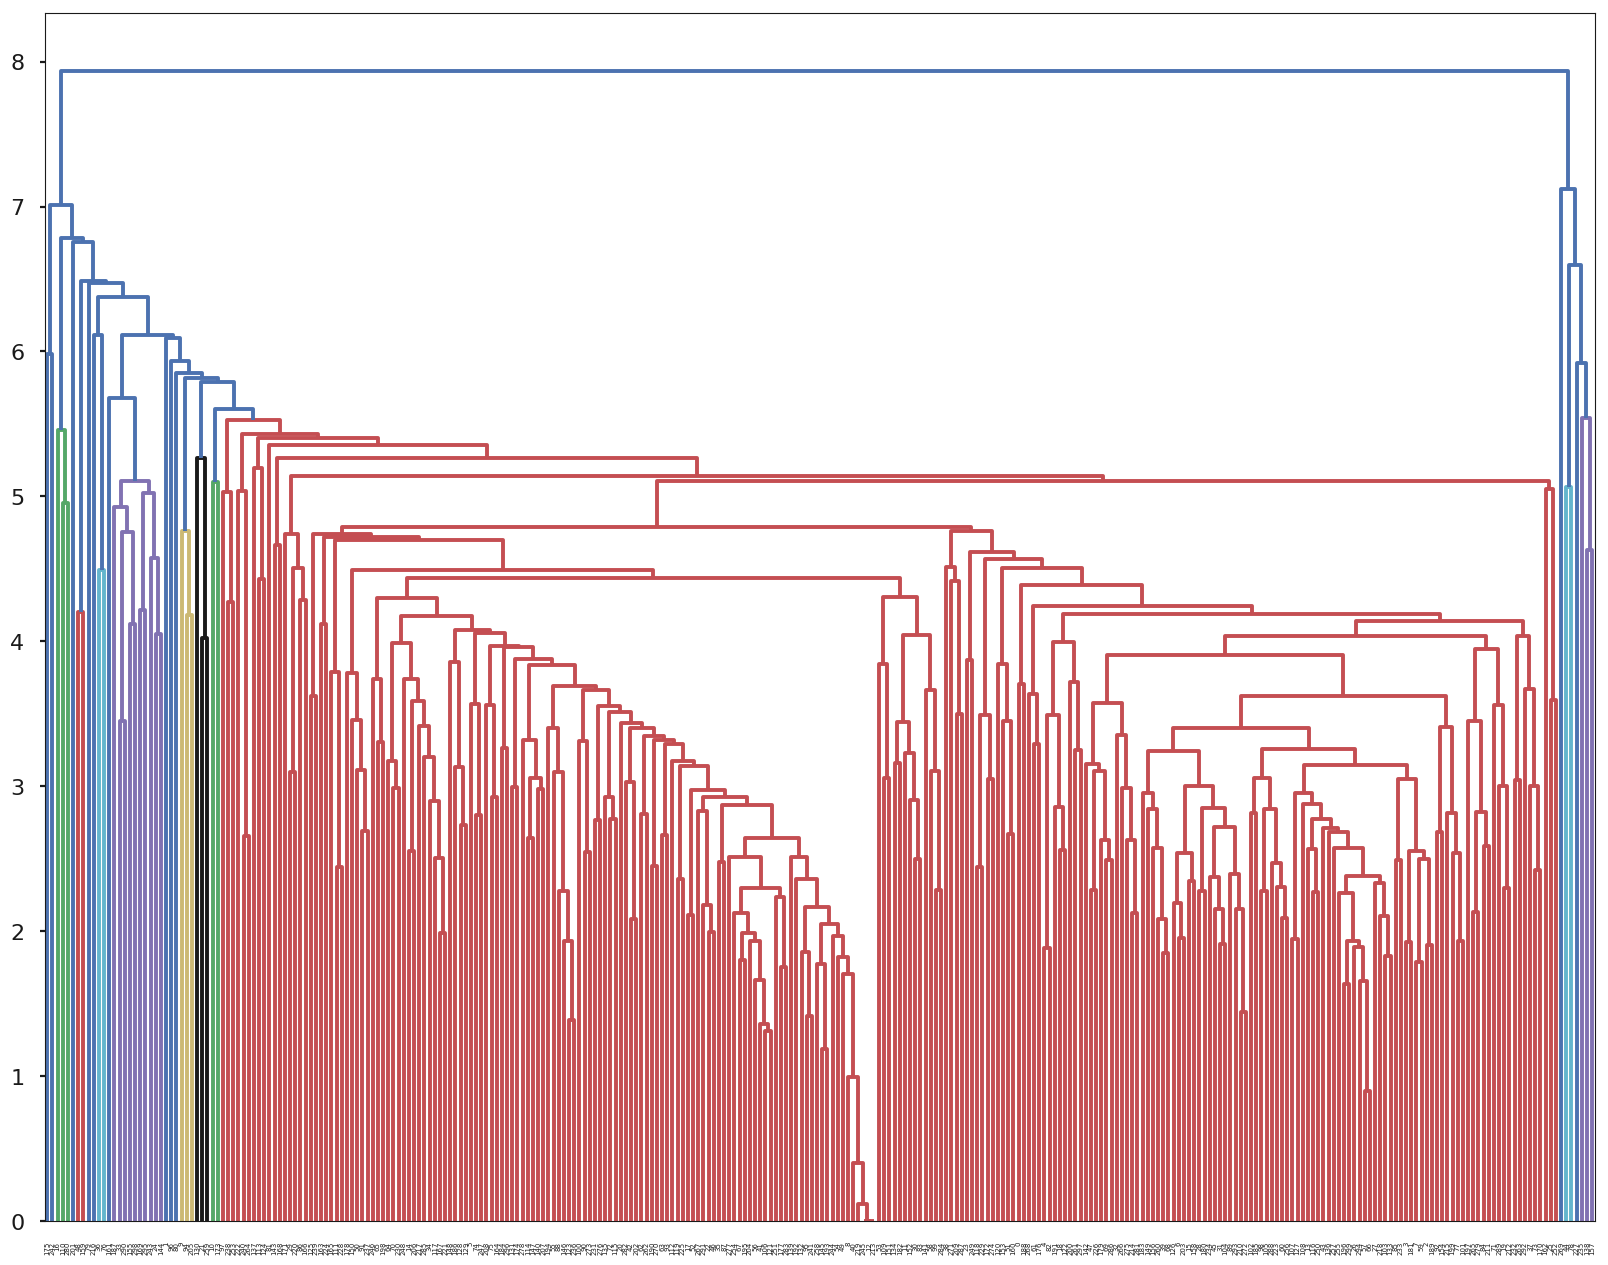

Hit Ratio:  0.701149425287





Recommendation info summary for :  Charlotte
number of valid user:  838
number of valid test user:  838


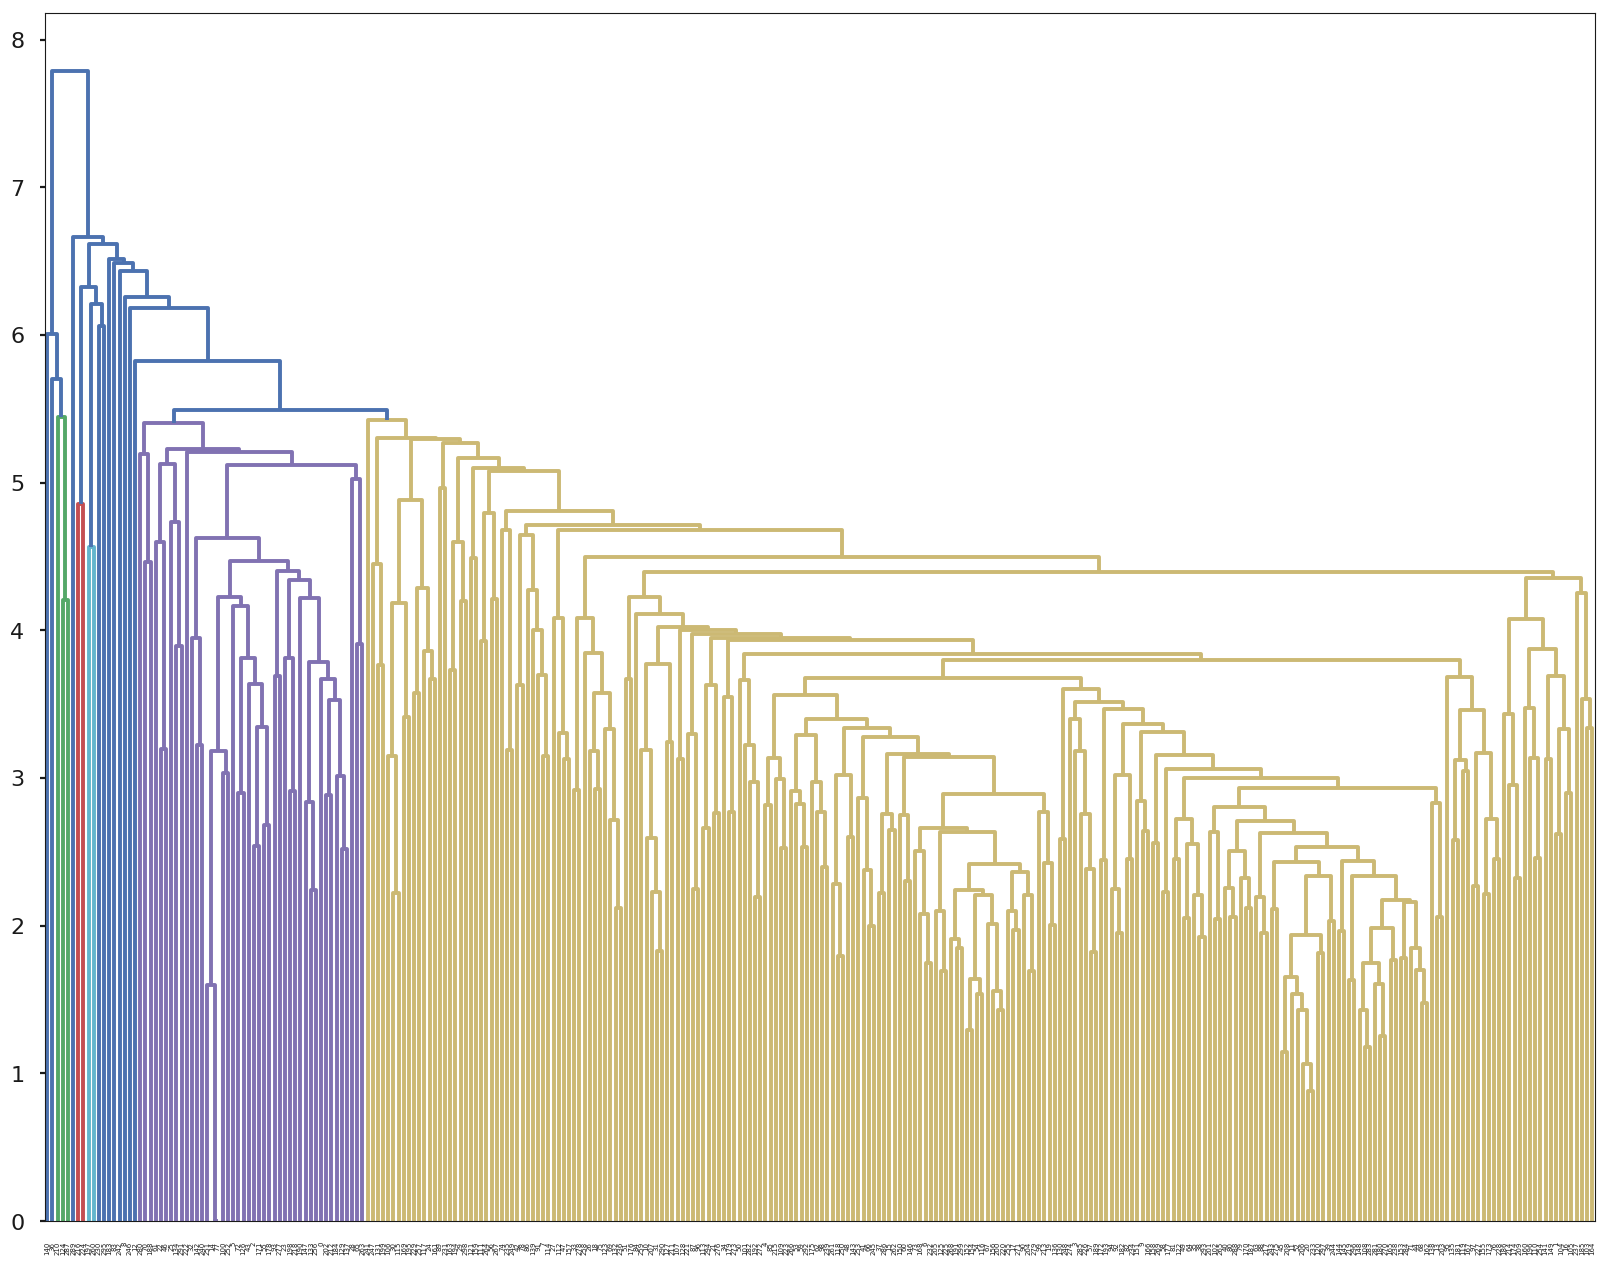

Hit Ratio:  0.771929824561





Recommendation info summary for :  Pittsburgh
number of valid user:  637
number of valid test user:  637


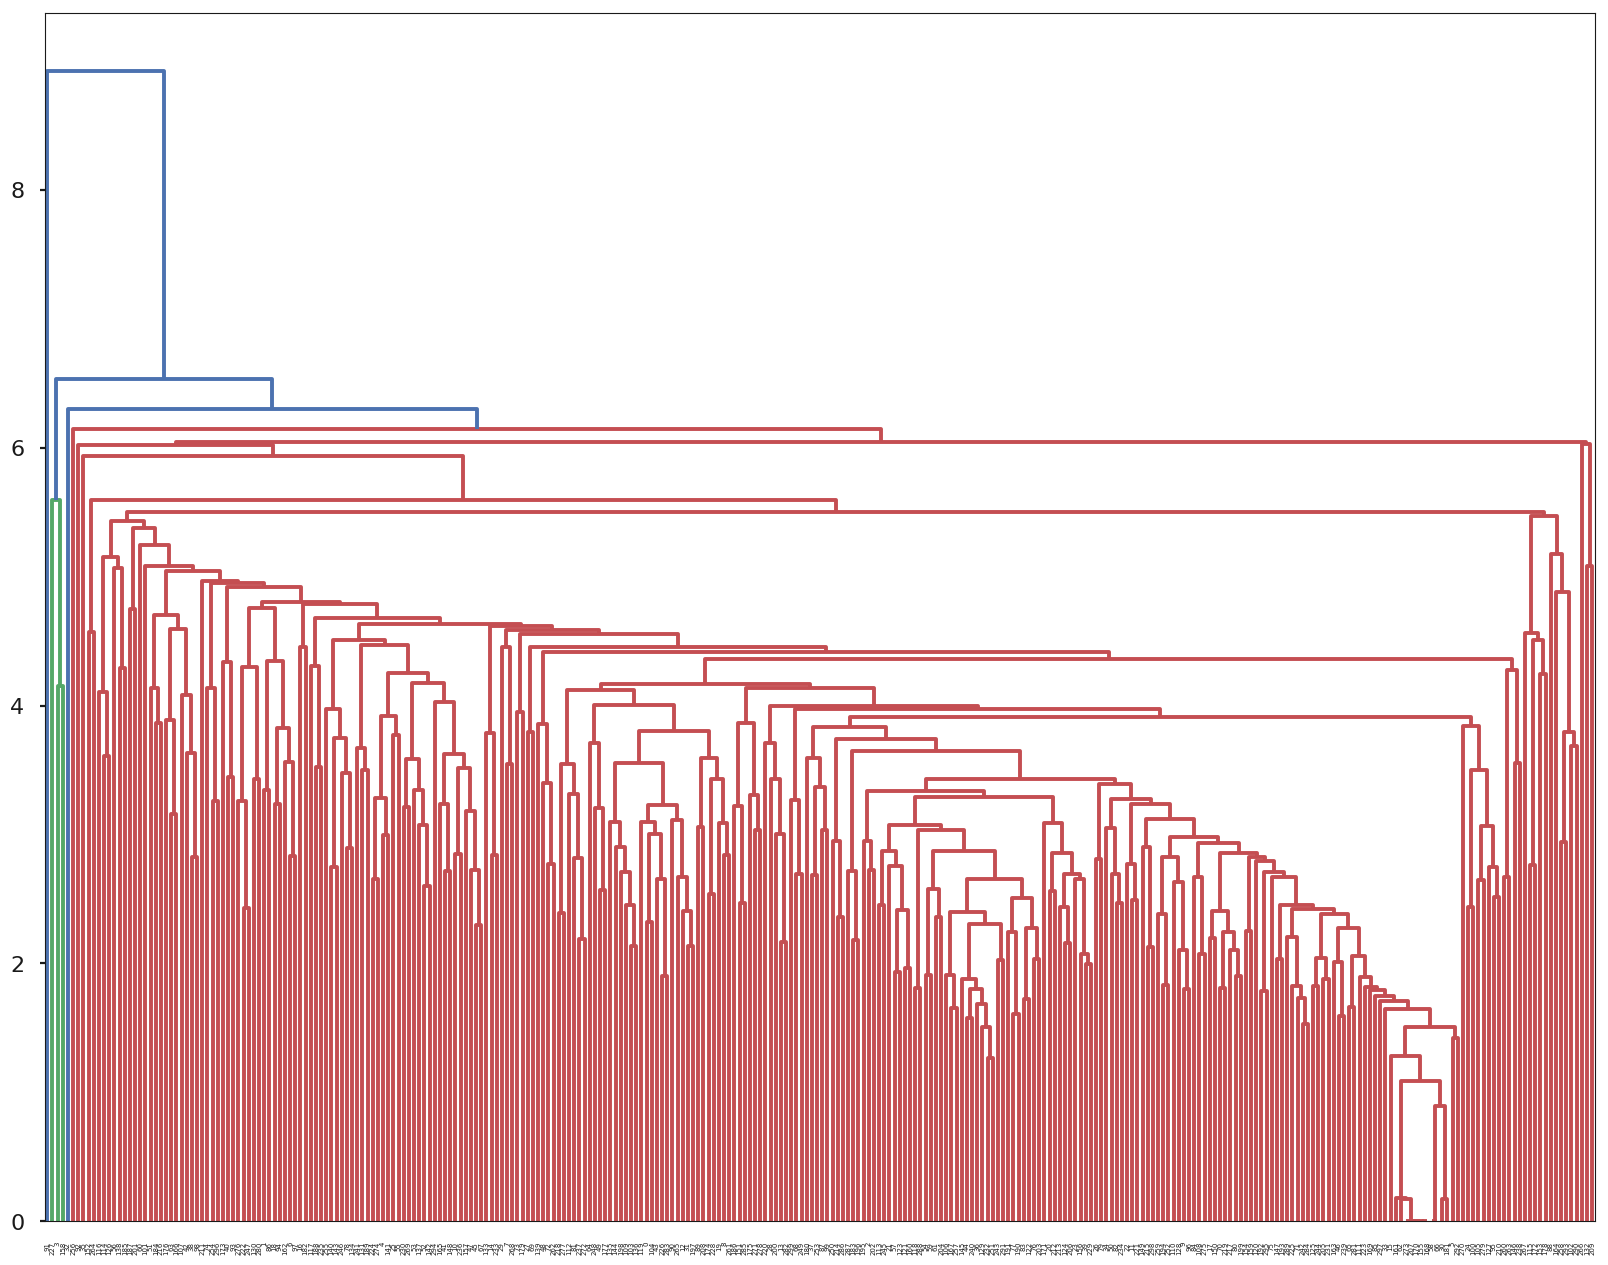

Hit Ratio:  0.739130434783





Recommendation info summary for :  Scottsdale
number of valid user:  882
number of valid test user:  882


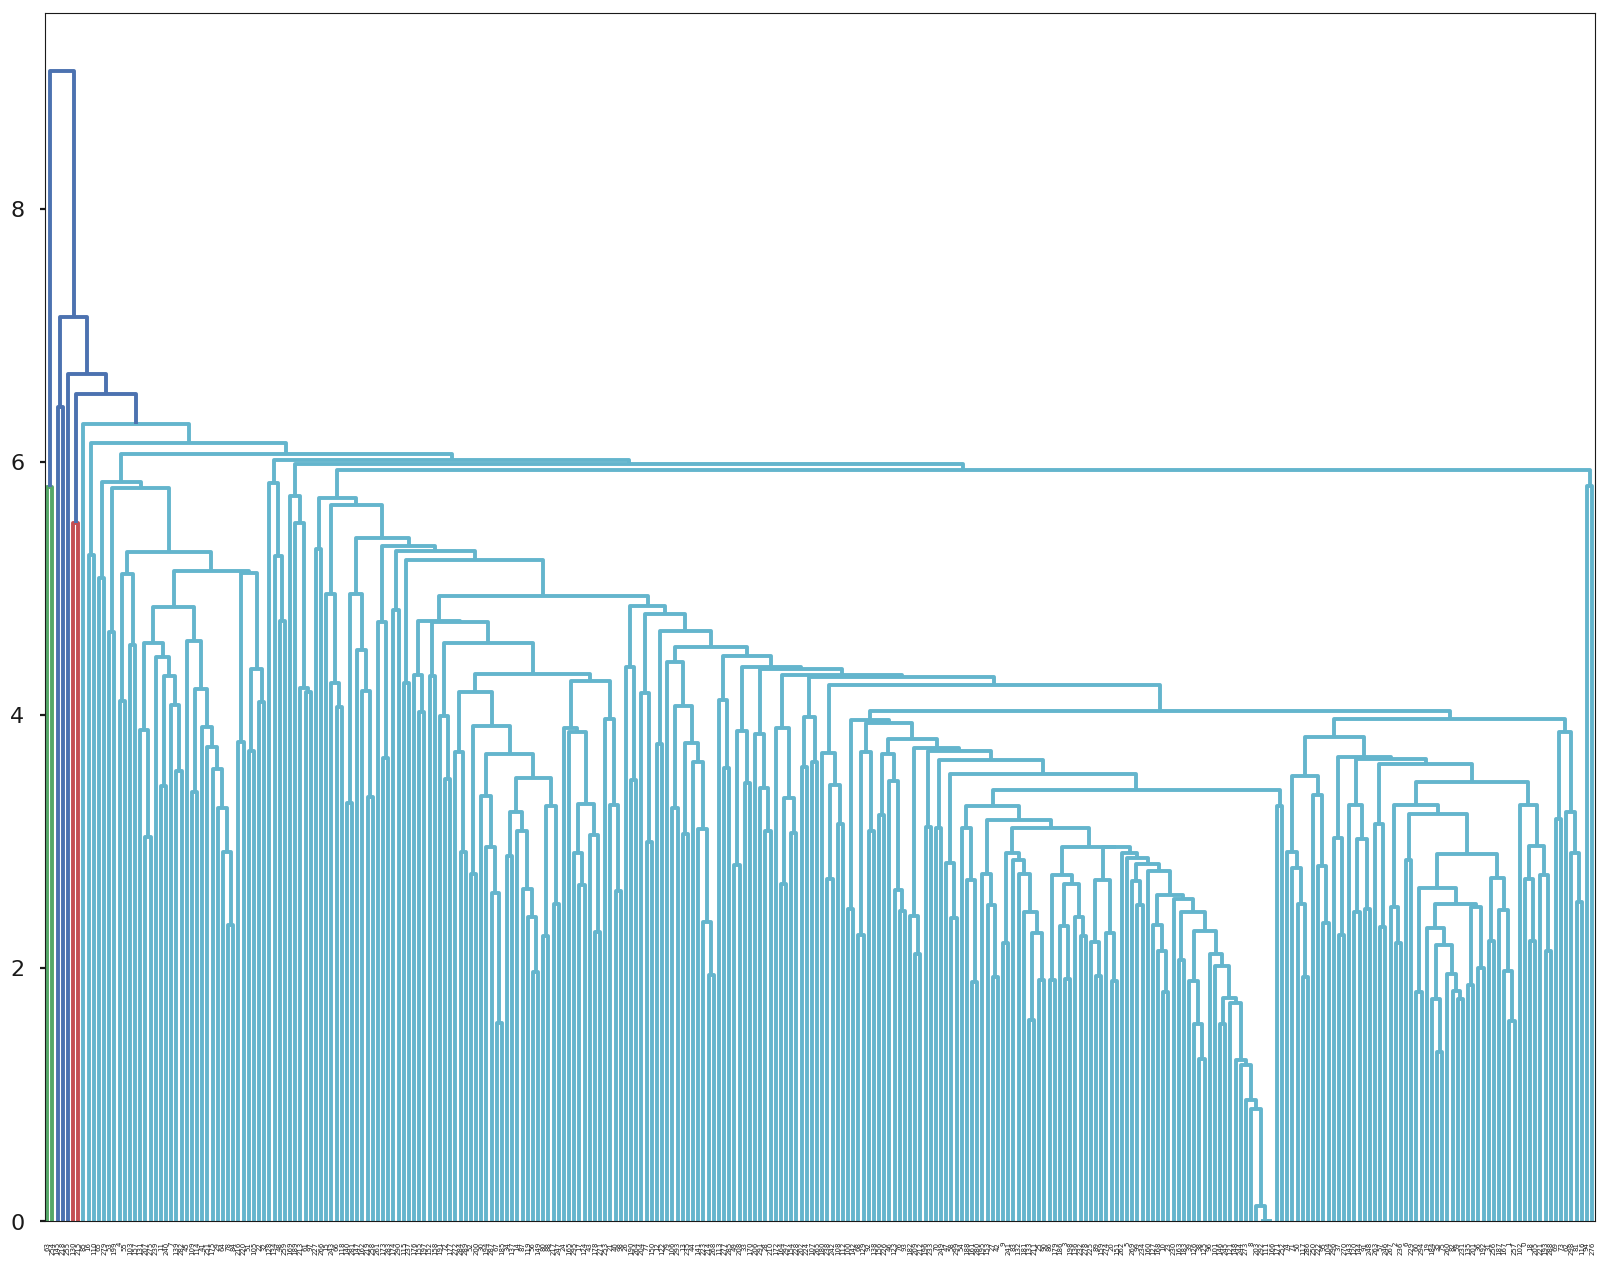

Hit Ratio:  0.719512195122





Recommendation info summary for :  Montréal
number of valid user:  378
number of valid test user:  378


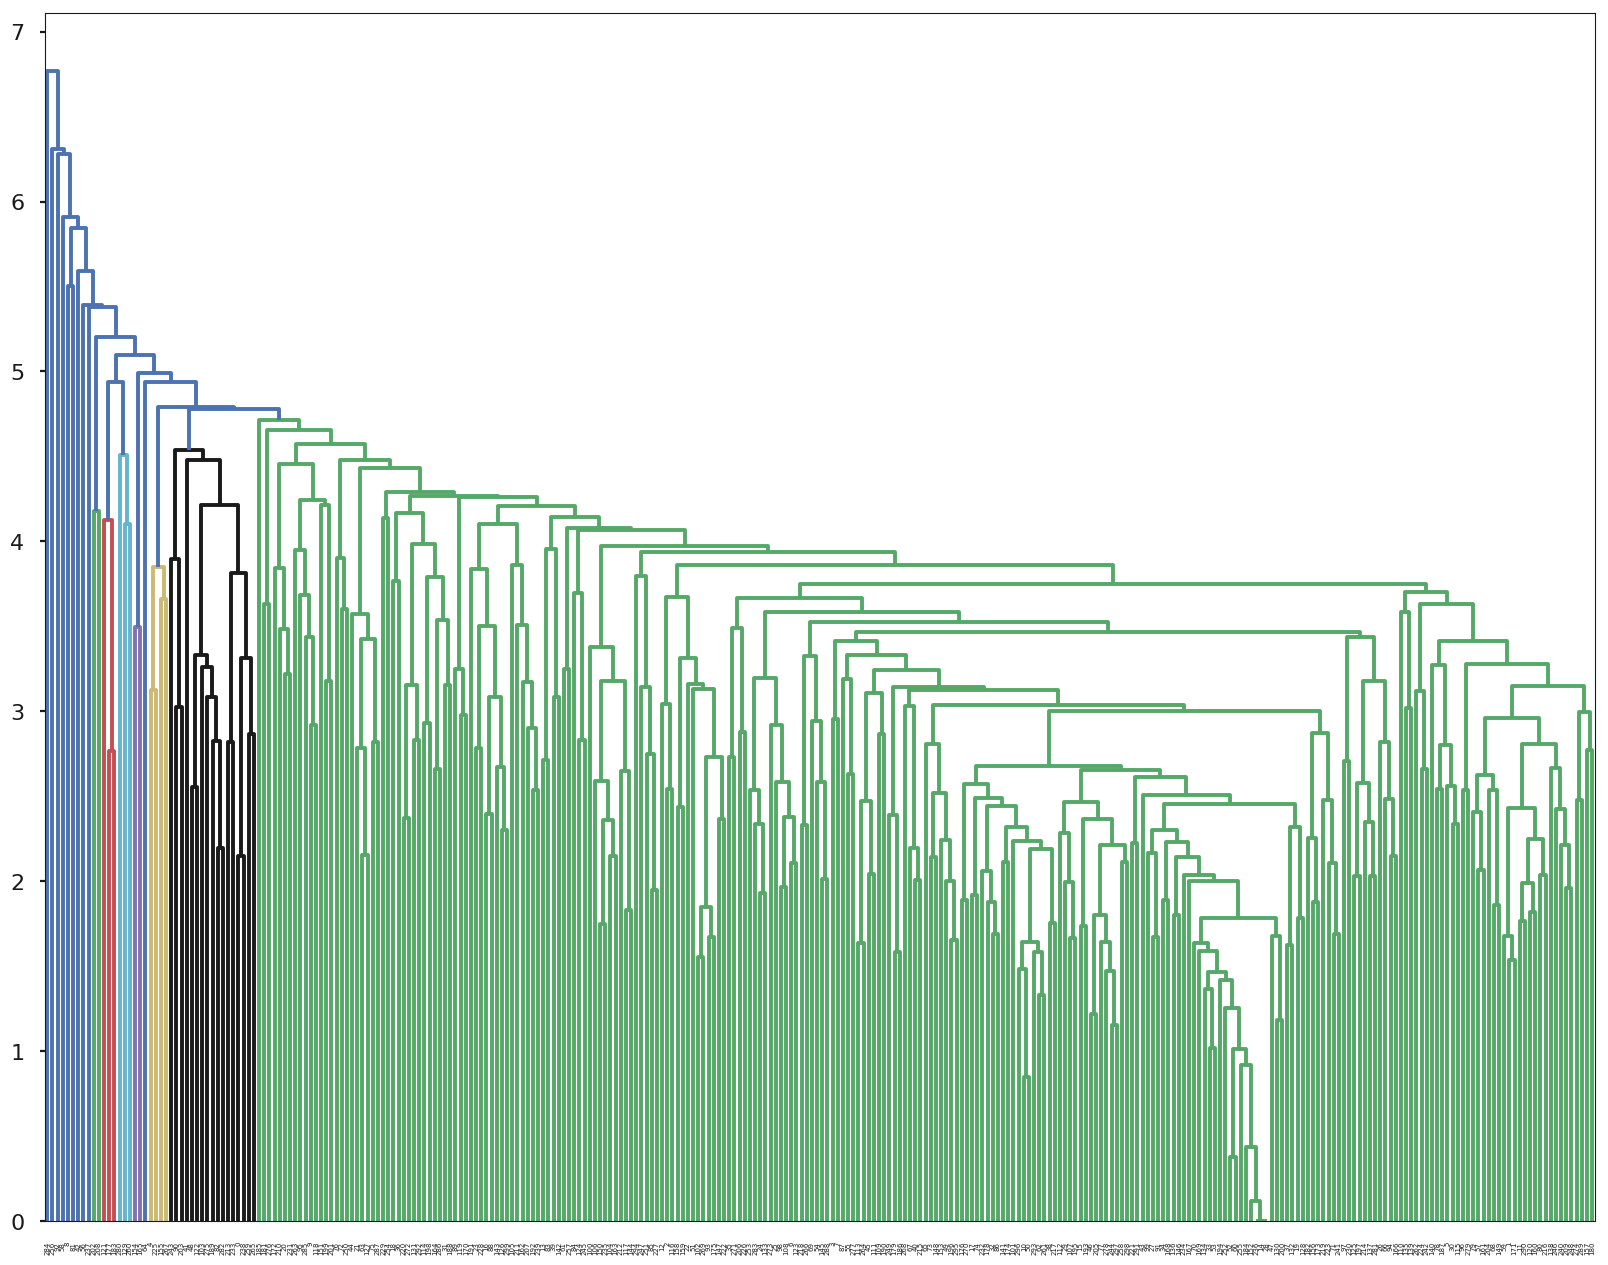

Hit Ratio:  0.777777777778





Recommendation info summary for :  Cleveland
number of valid user:  268
number of valid test user:  268


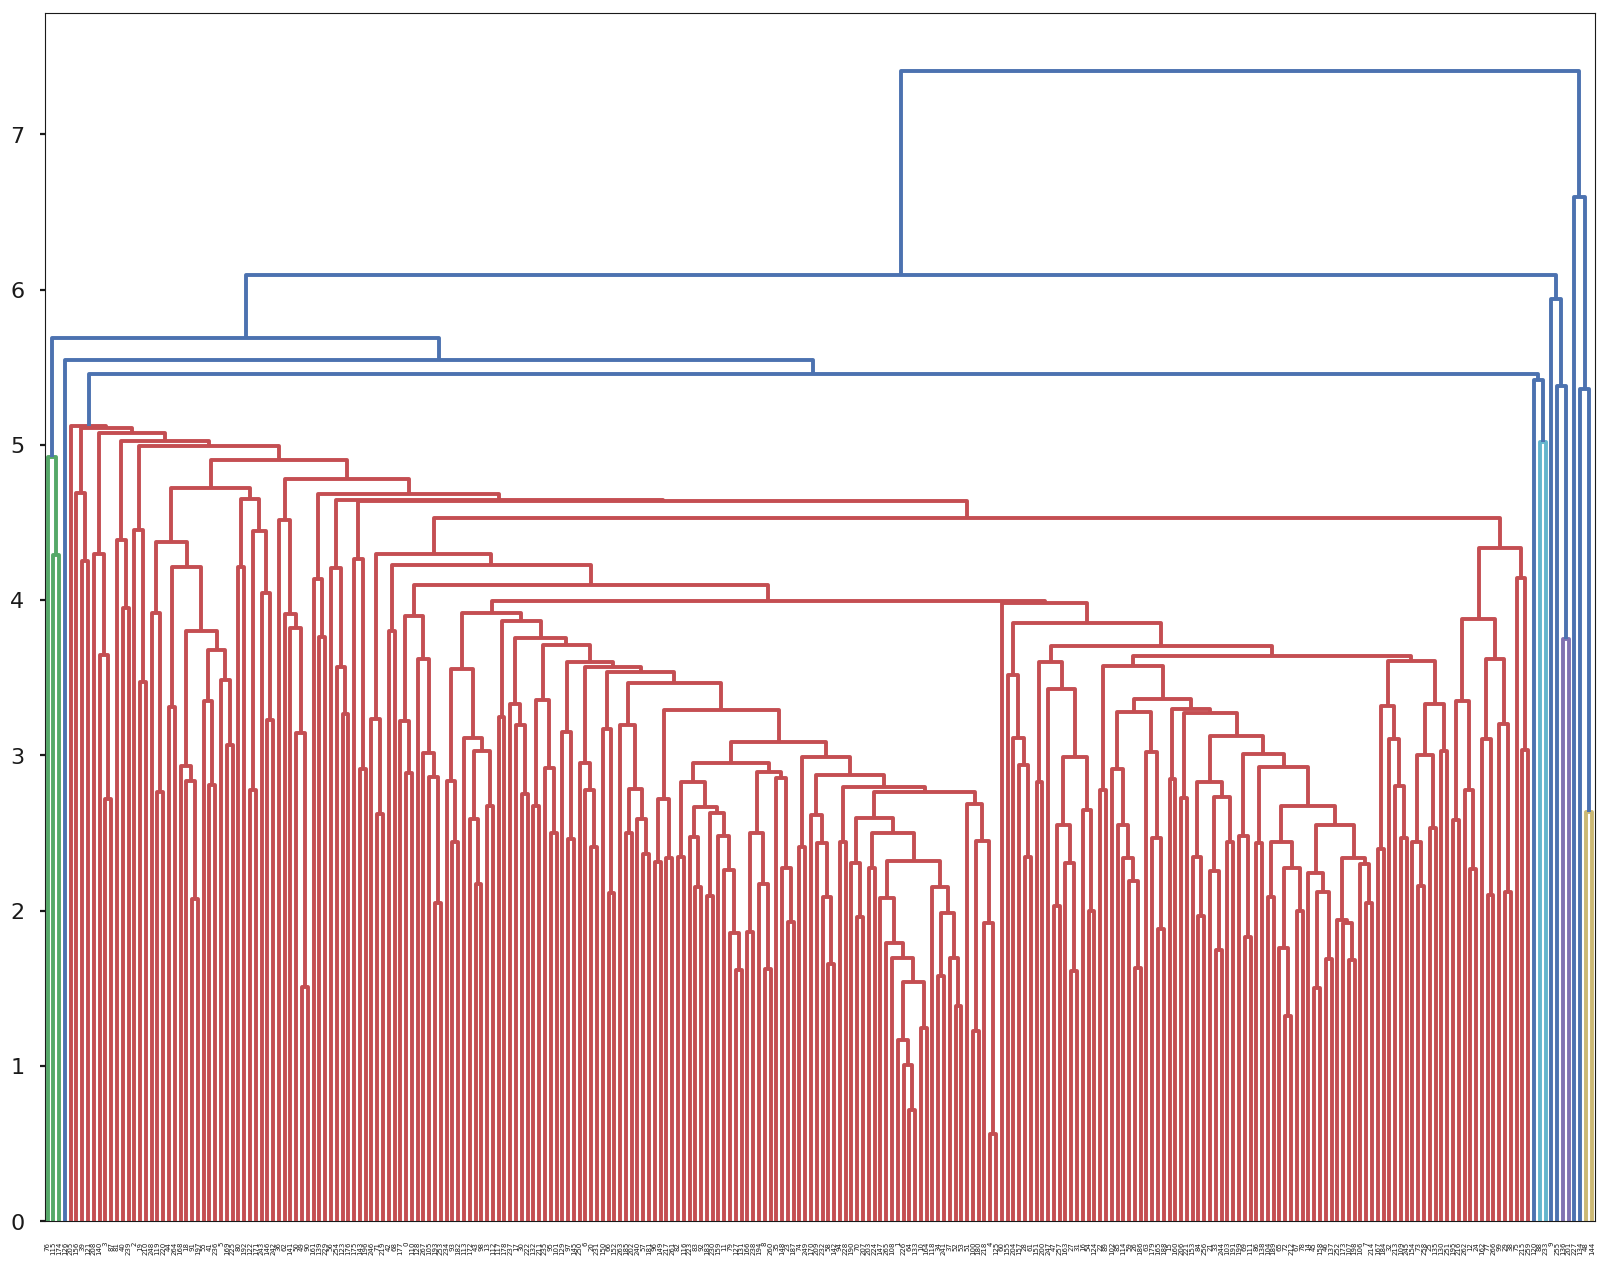

Hit Ratio:  0.8





Recommendation info summary for :  Madison
number of valid user:  325
number of valid test user:  325


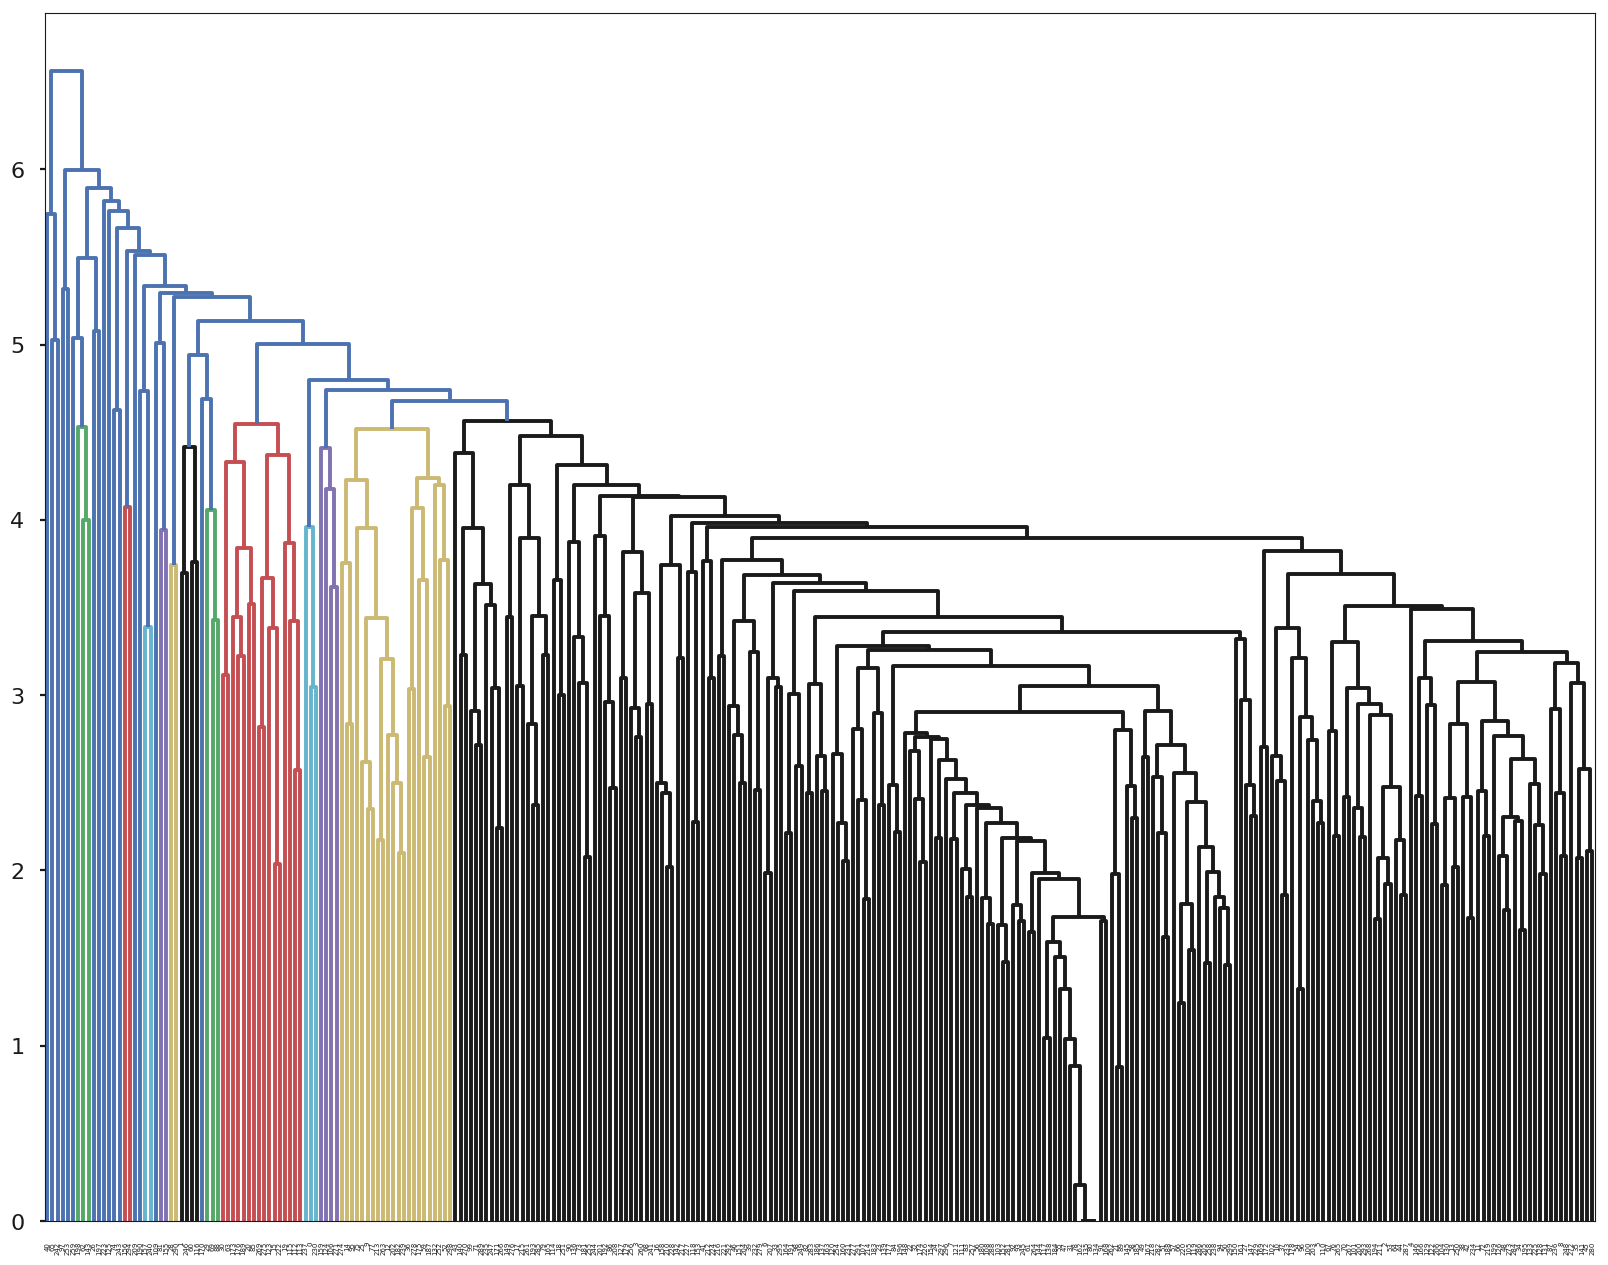

Hit Ratio:  0.627906976744





Recommendation info summary for :  Edinburgh
number of valid user:  94
number of valid test user:  94


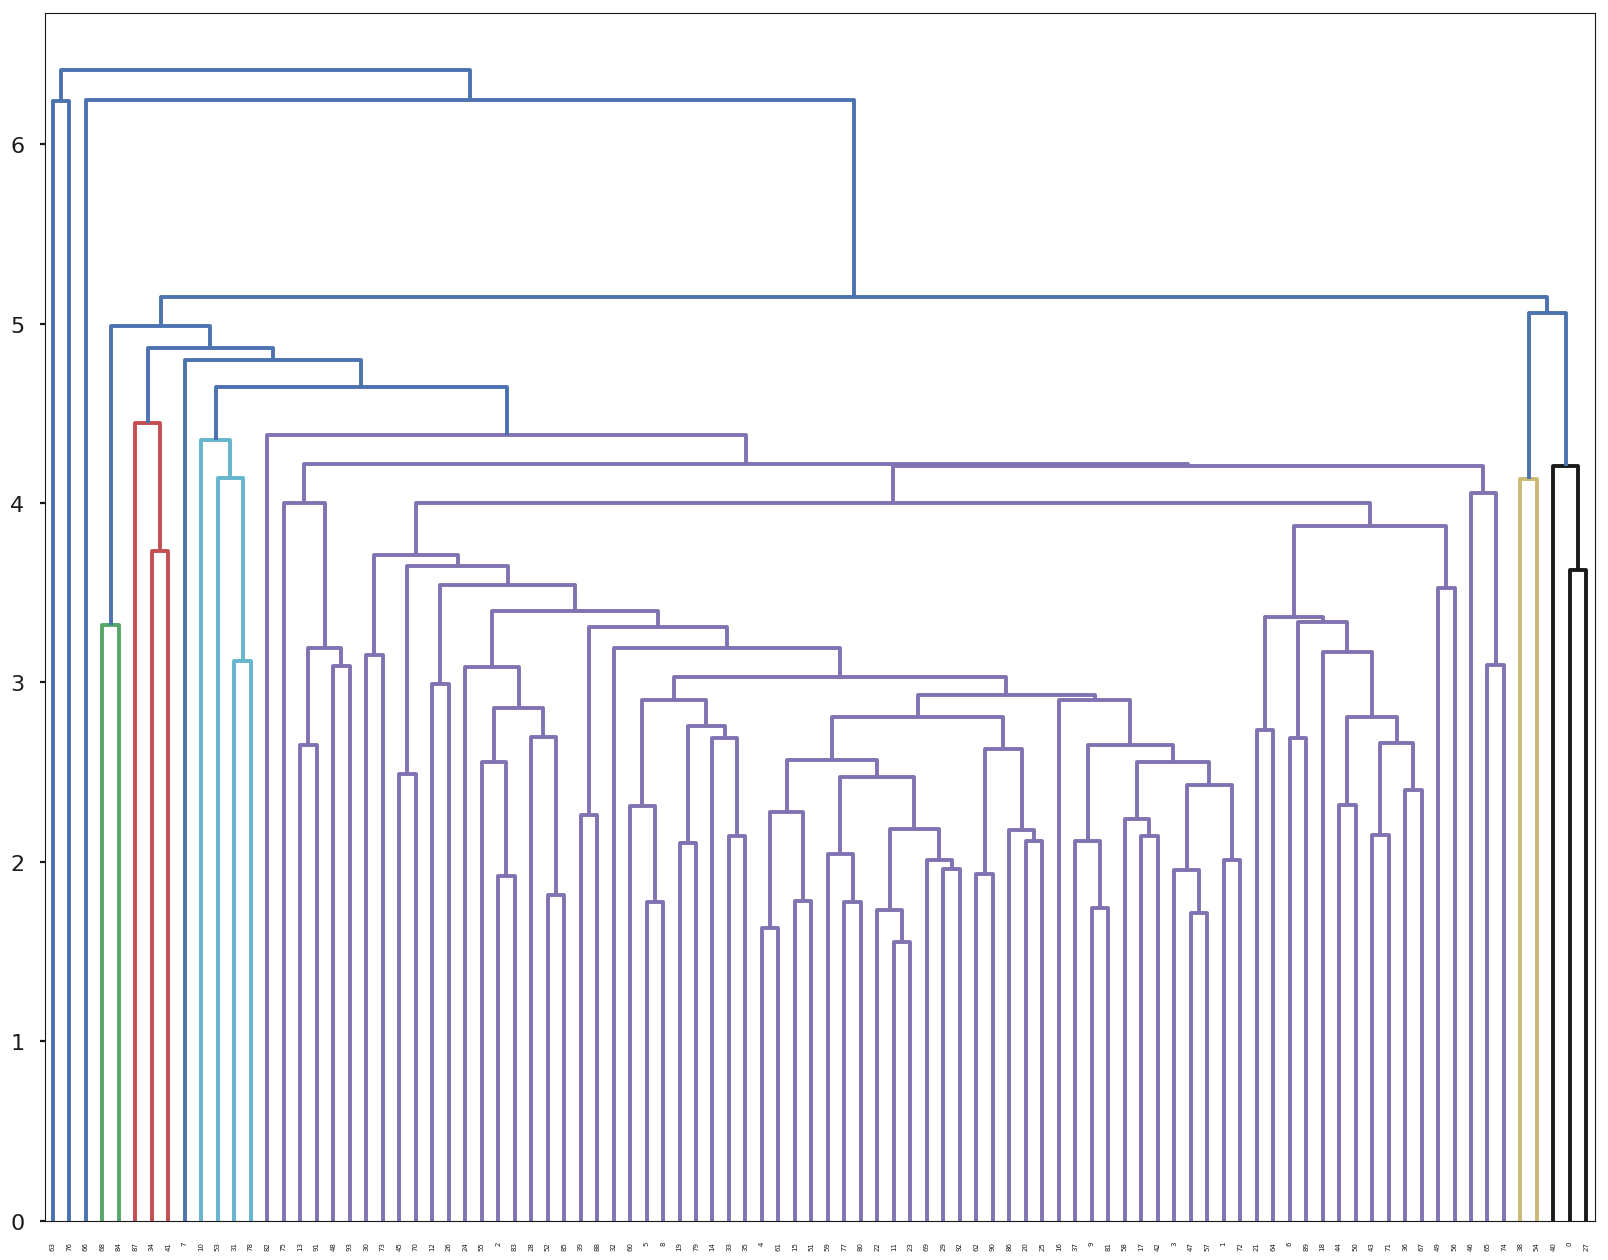

Hit Ratio:  1.0





Recommendation info summary for :  Tempe
number of valid user:  334
number of valid test user:  334


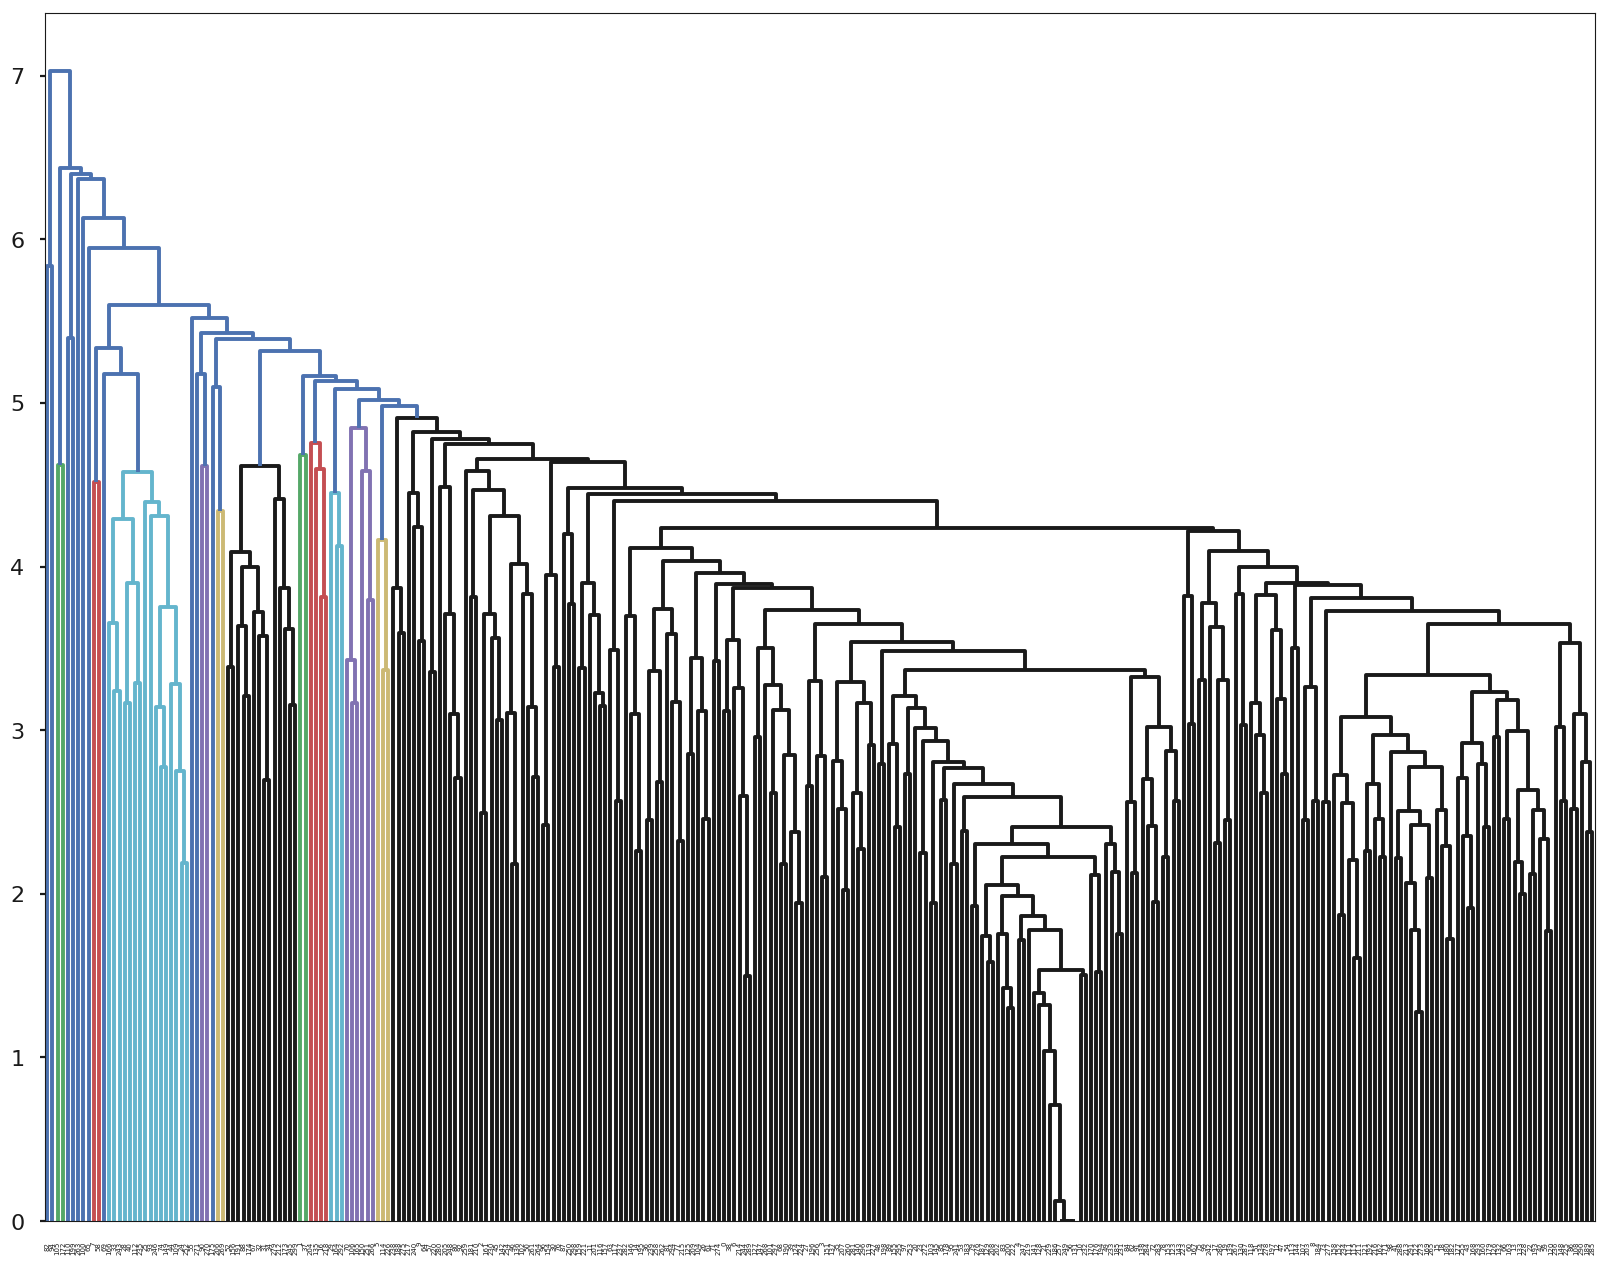

Hit Ratio:  0.583333333333





Recommendation info summary for :  Mesa
number of valid user:  264
number of valid test user:  264


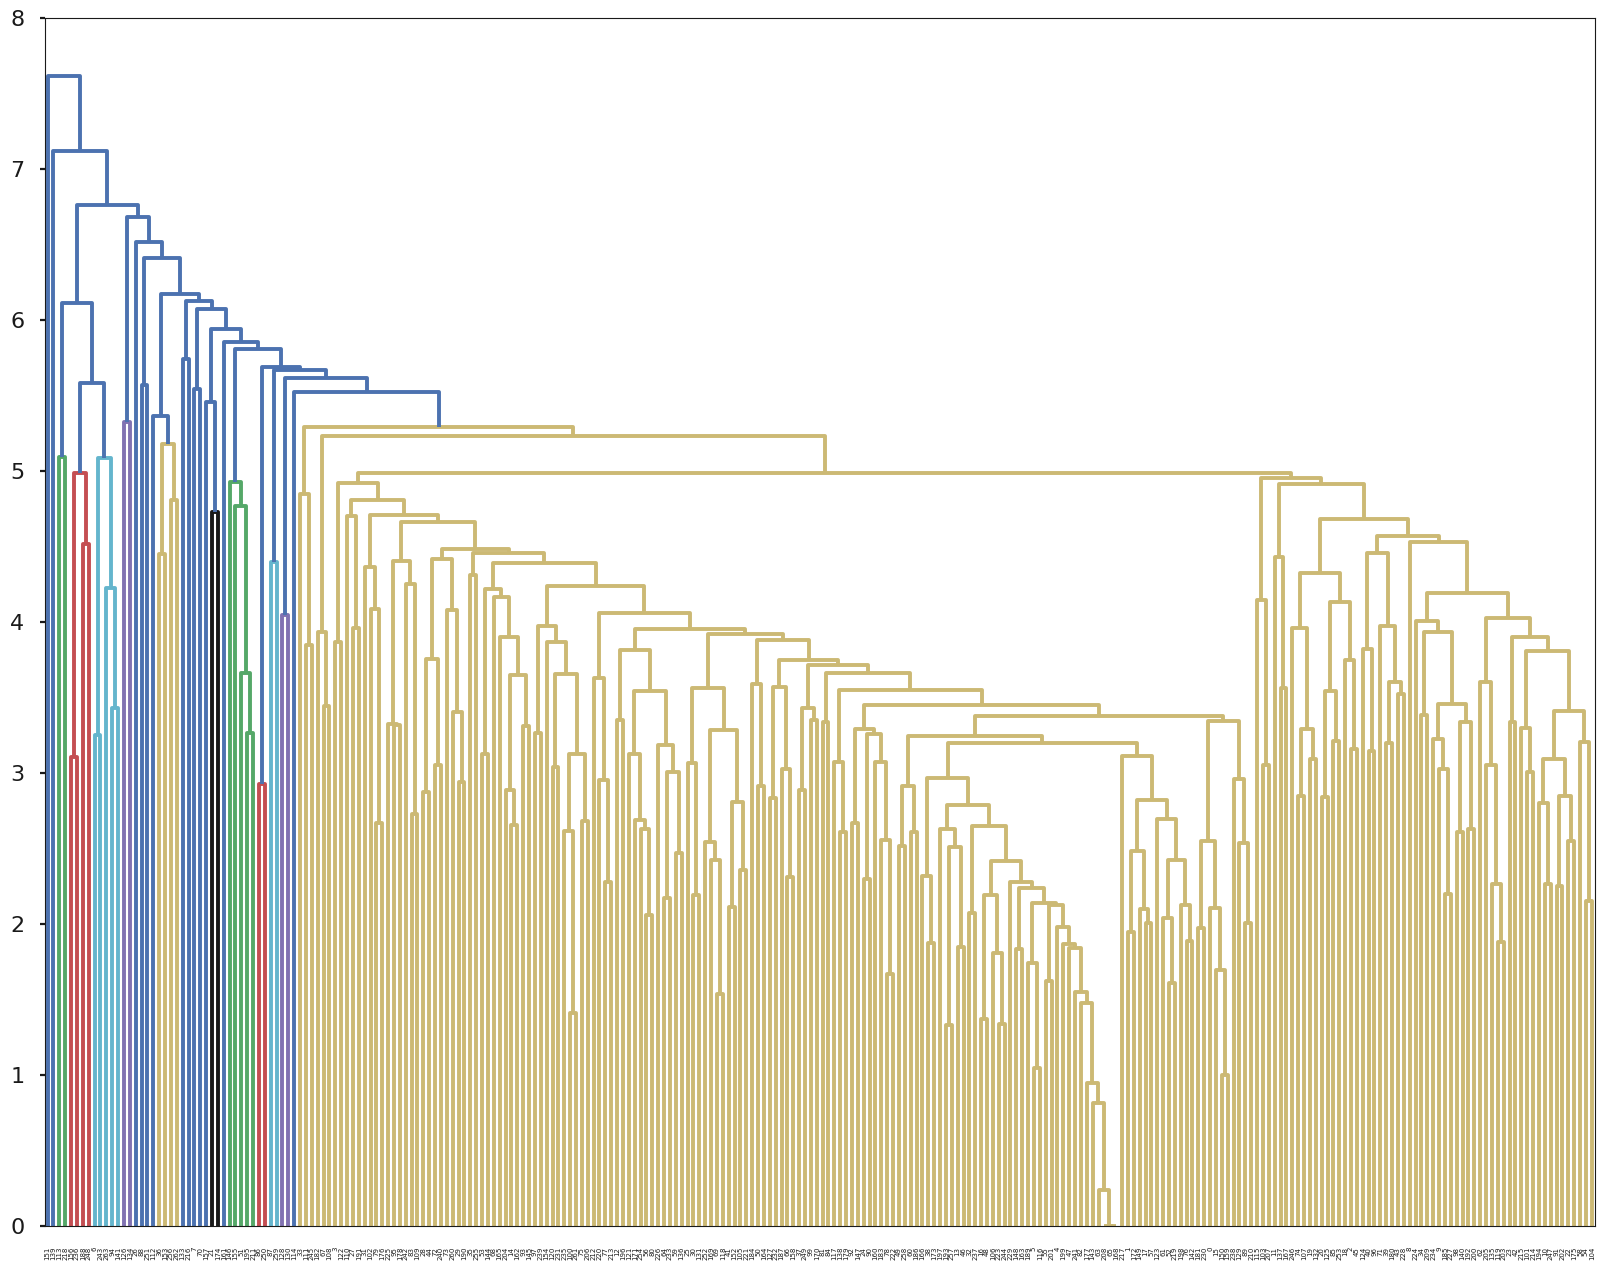

Hit Ratio:  0.555555555556





Recommendation info summary for :  Henderson
number of valid user:  423
number of valid test user:  423


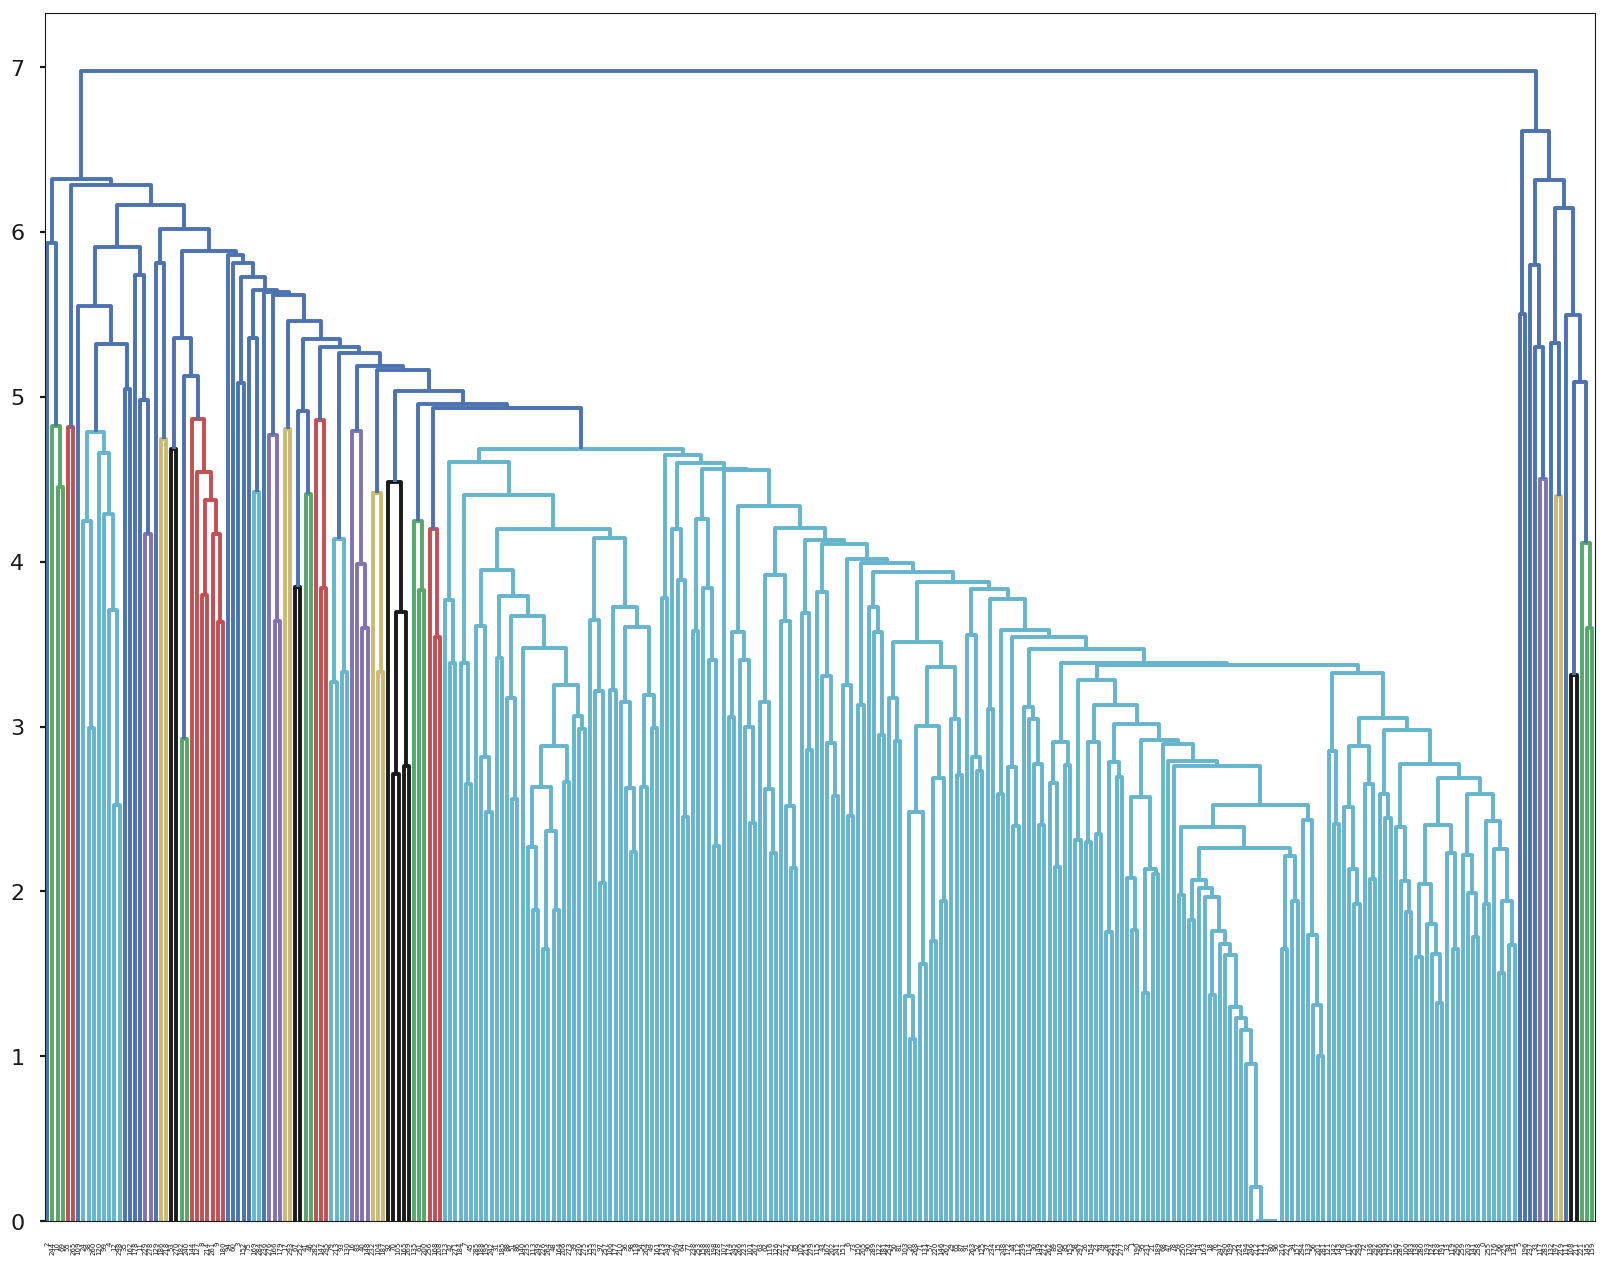

Hit Ratio:  0.698113207547





Recommendation info summary for :  Stuttgart
number of valid user:  21
number of valid test user:  21


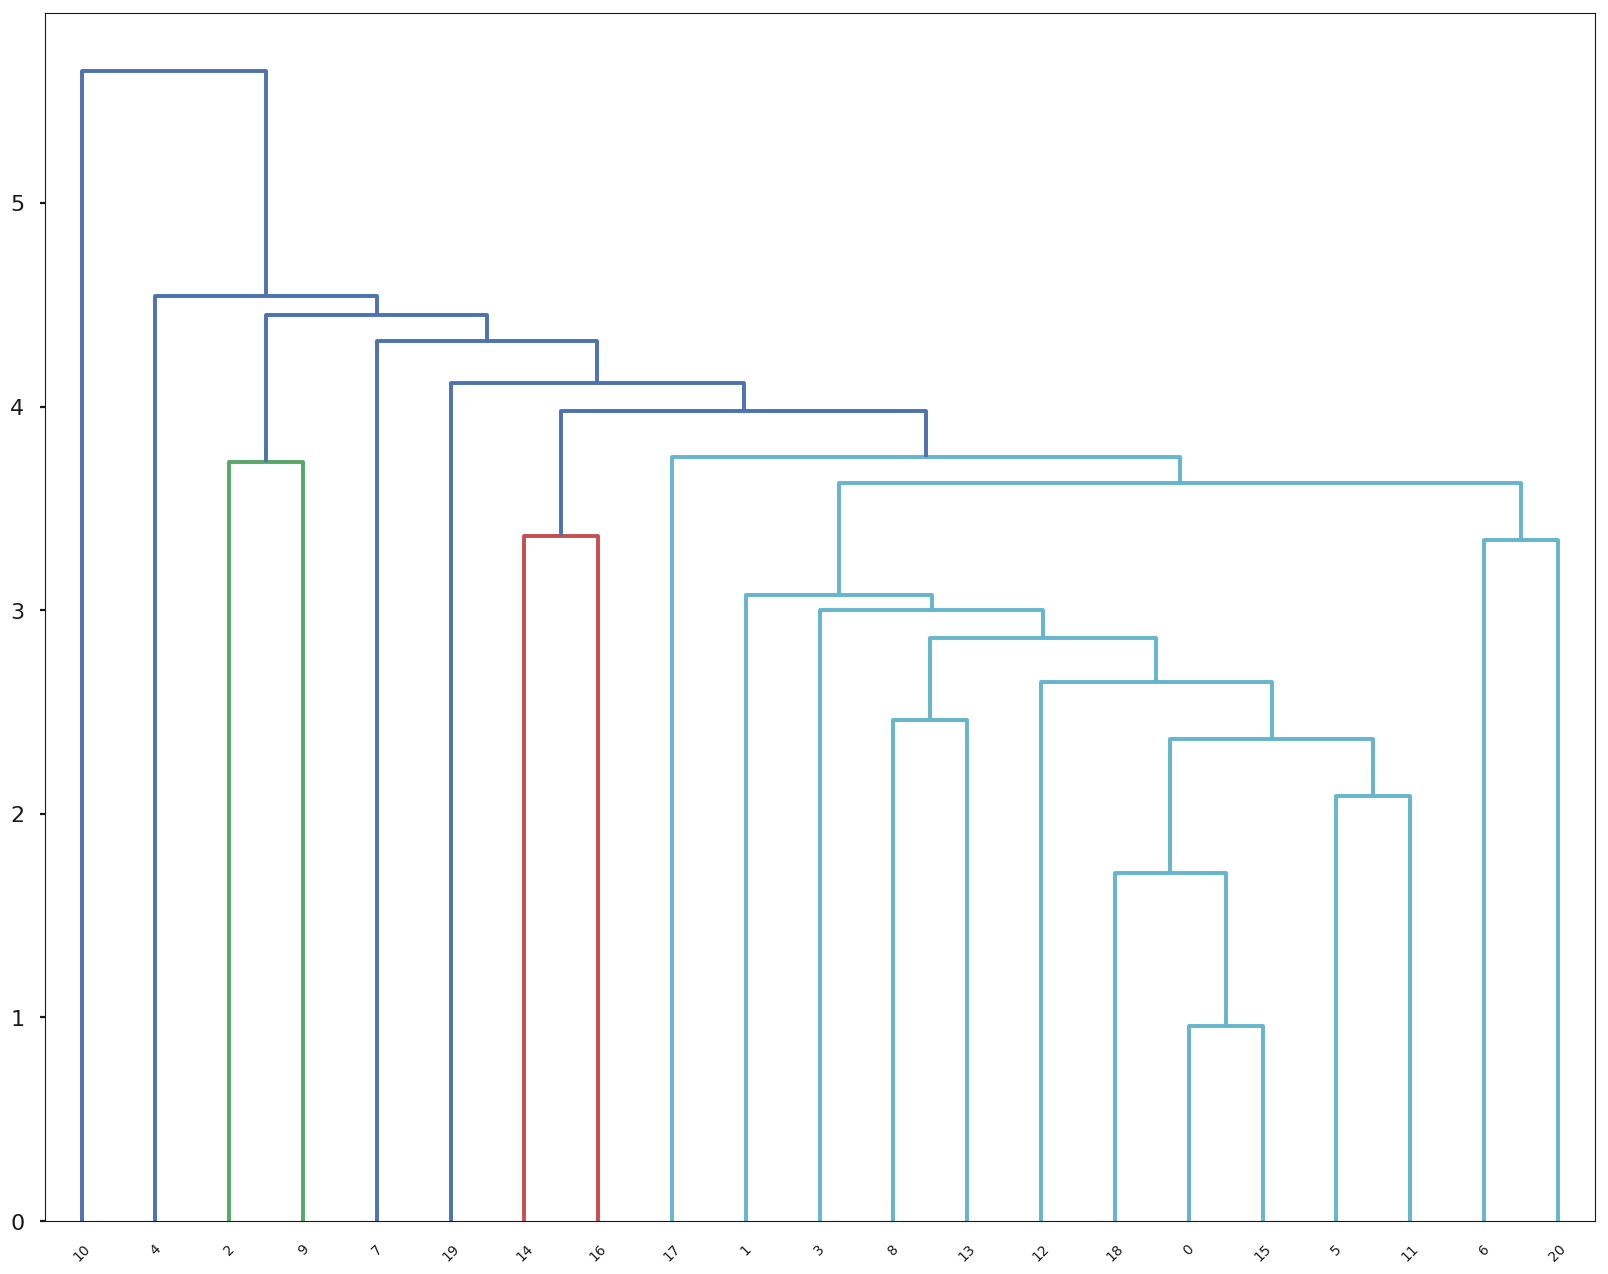

Hit Ratio:  1.0





Recommendation info summary for :  Chandler
number of valid user:  321
number of valid test user:  321


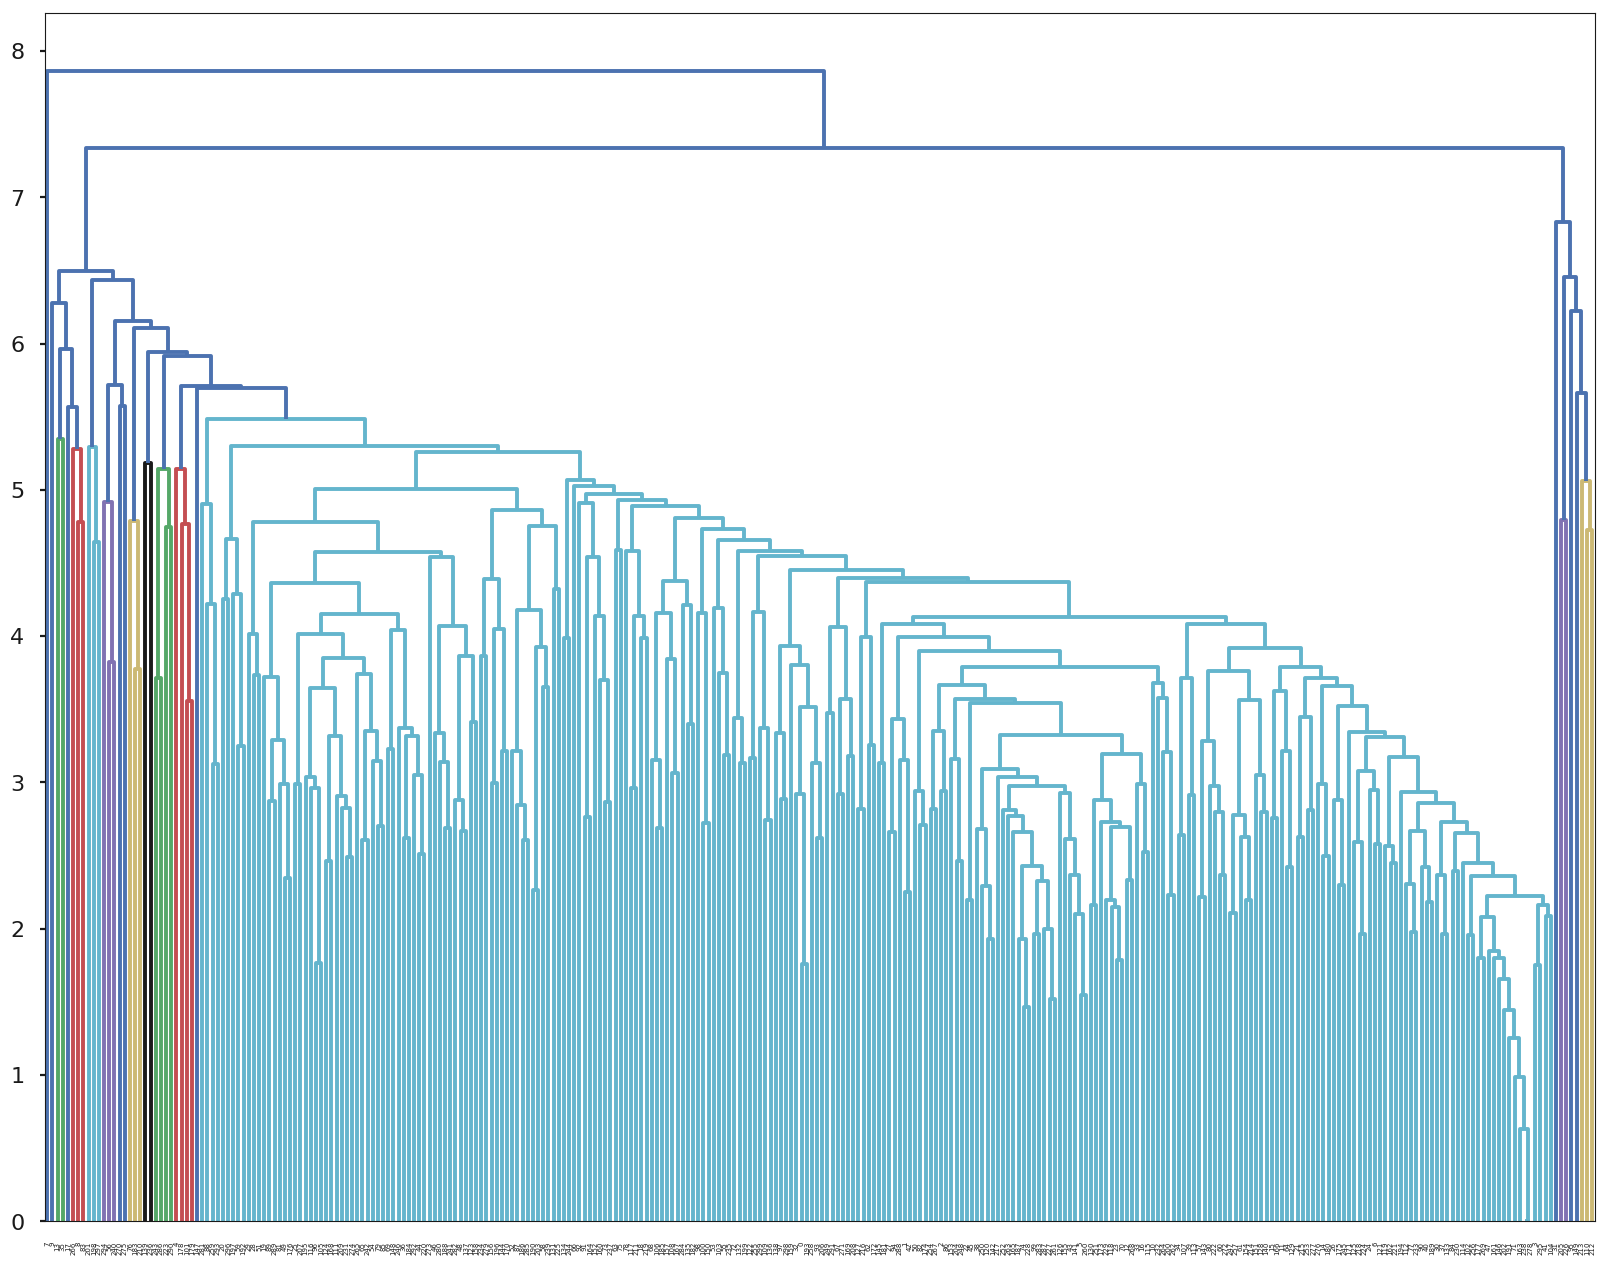

Hit Ratio:  0.7





Recommendation info summary for :  Mississauga
number of valid user:  165
number of valid test user:  165


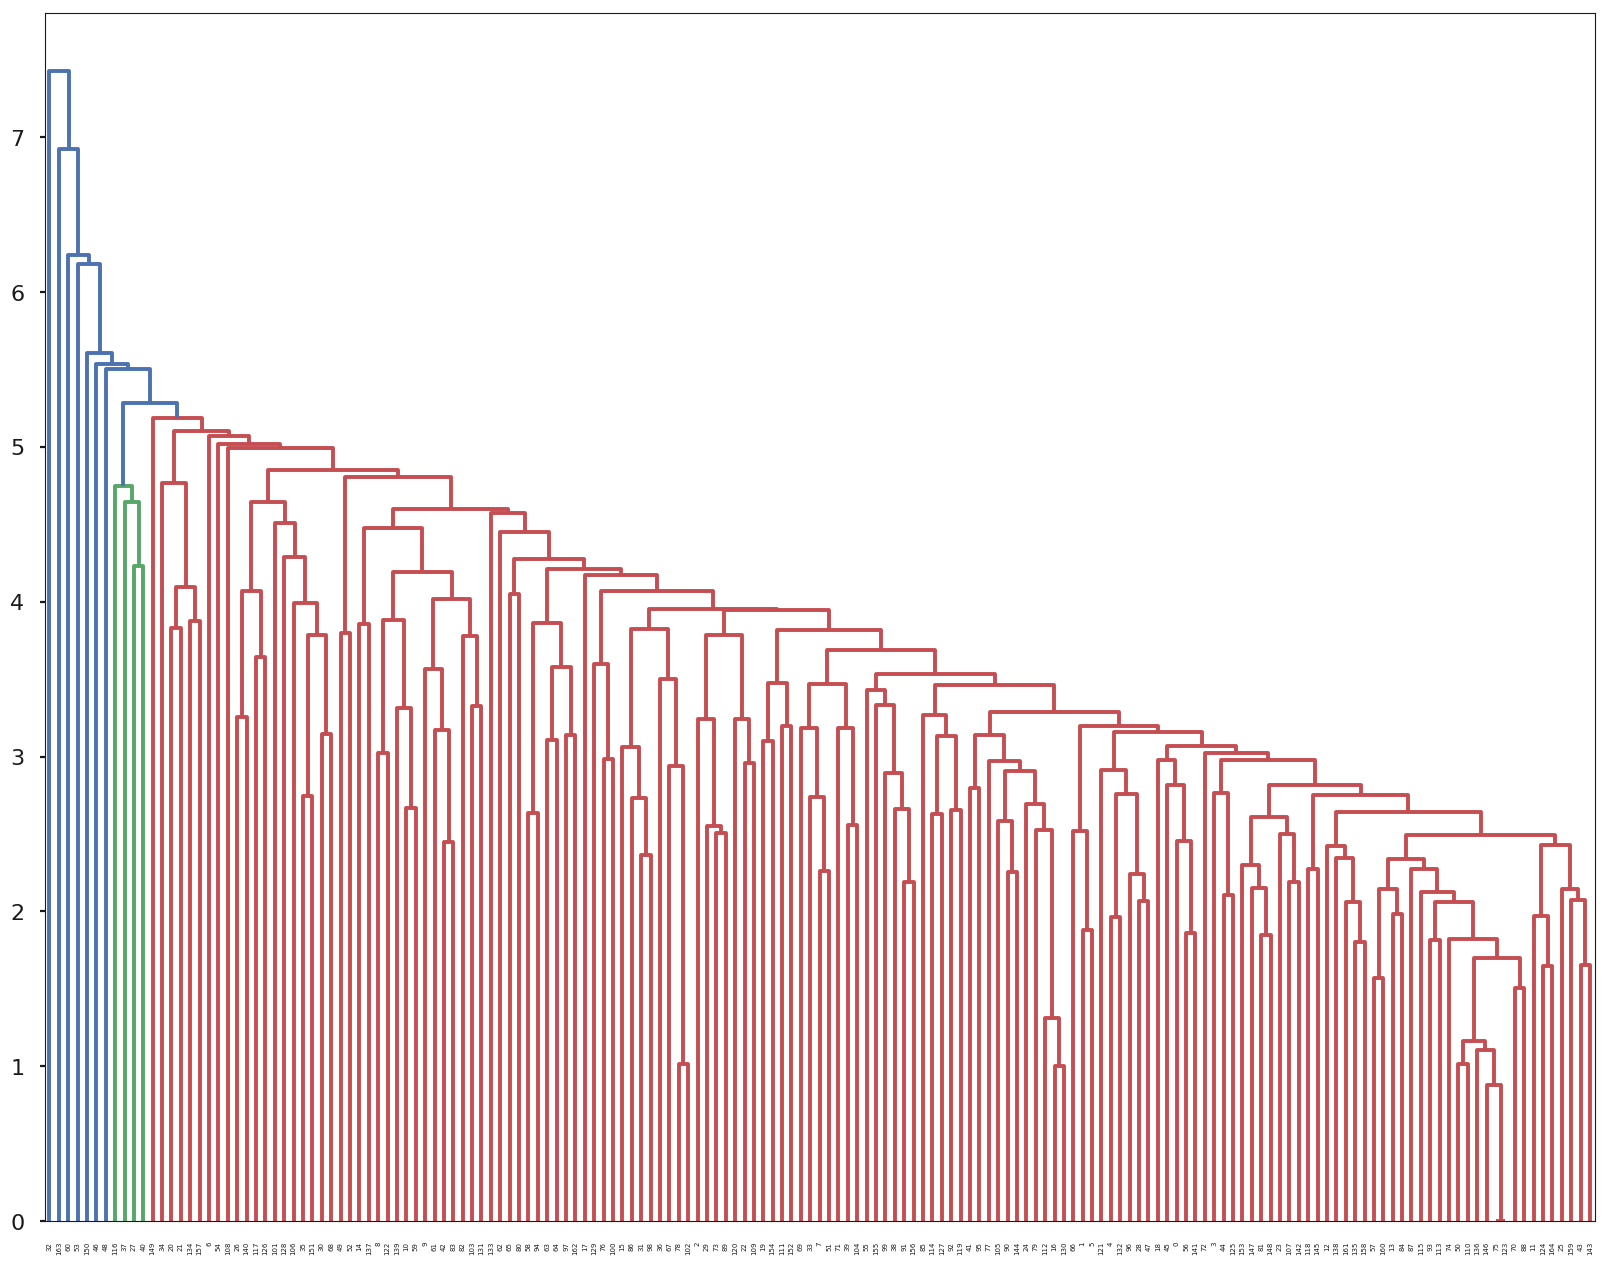

Hit Ratio:  0.375





Recommendation info summary for :  Glendale
number of valid user:  132
number of valid test user:  132


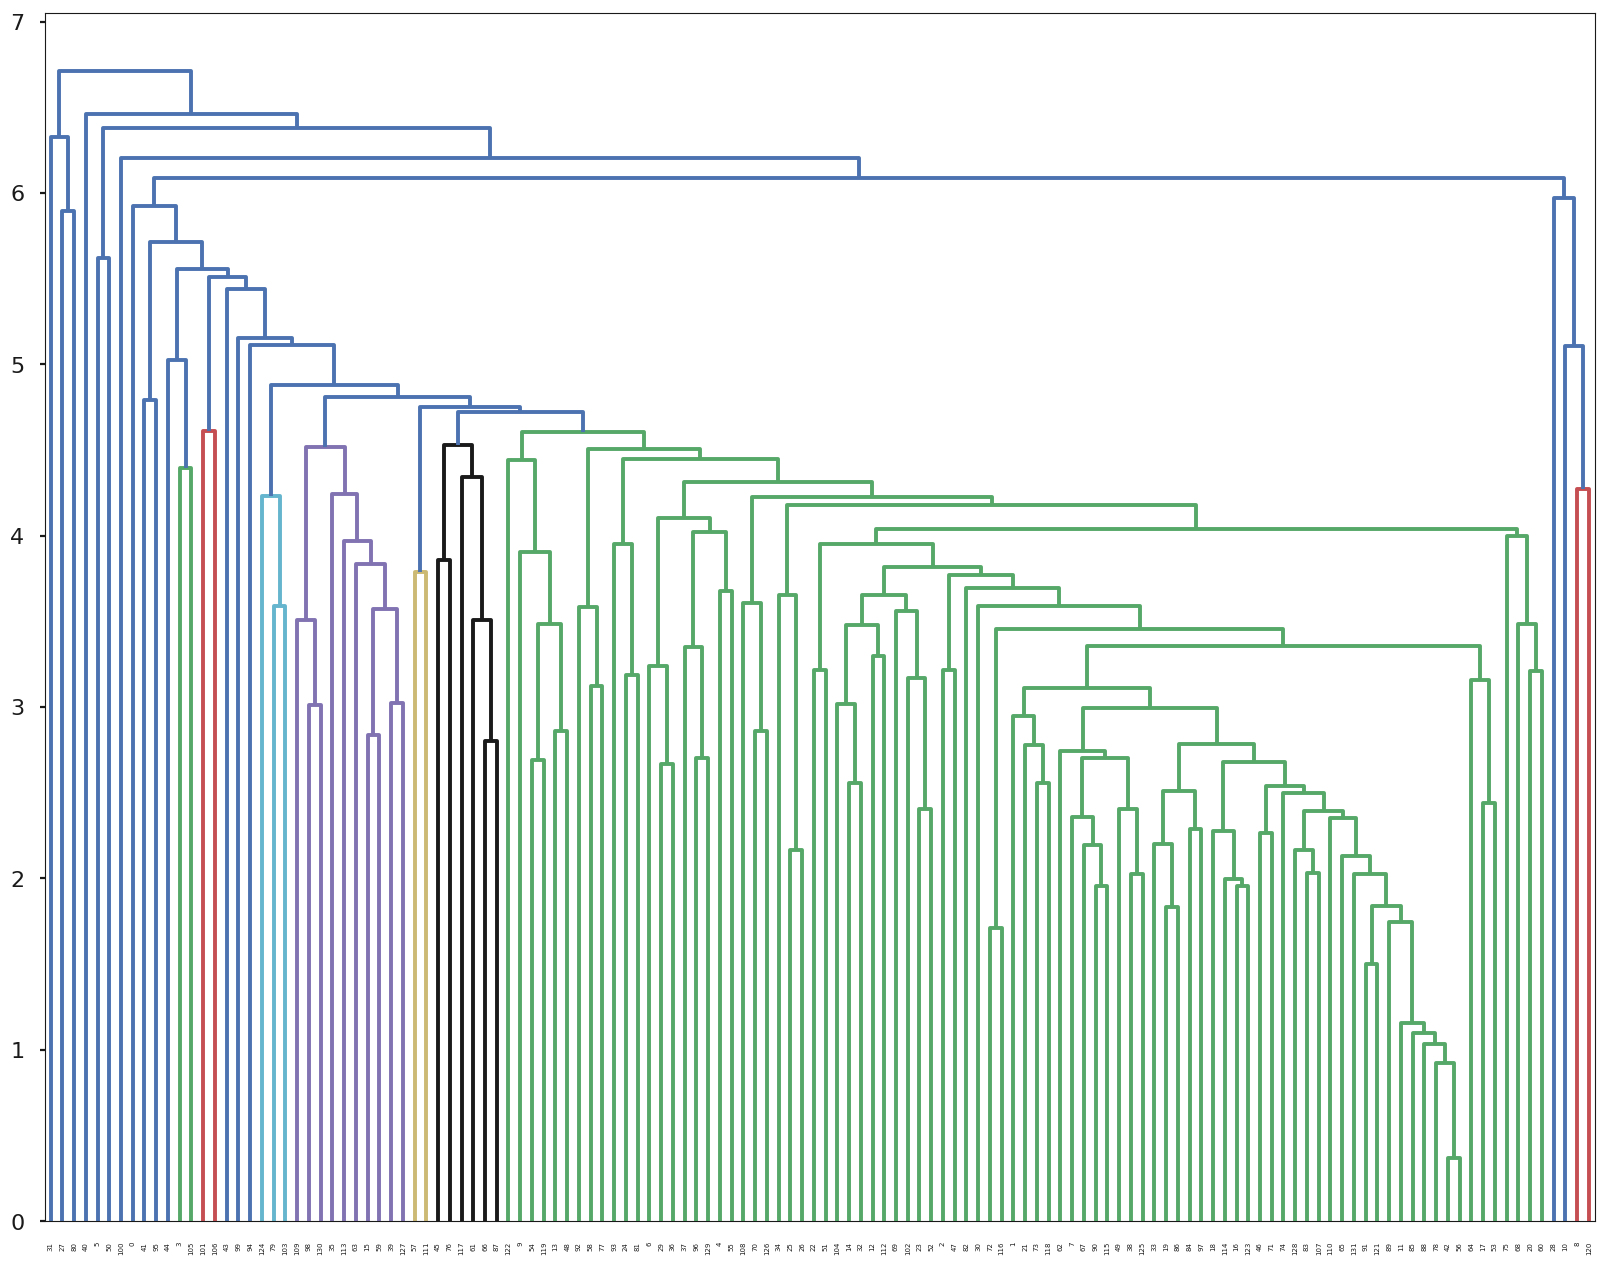

Hit Ratio:  0.708333333333





Recommendation info summary for :  Gilbert
number of valid user:  202
number of valid test user:  202


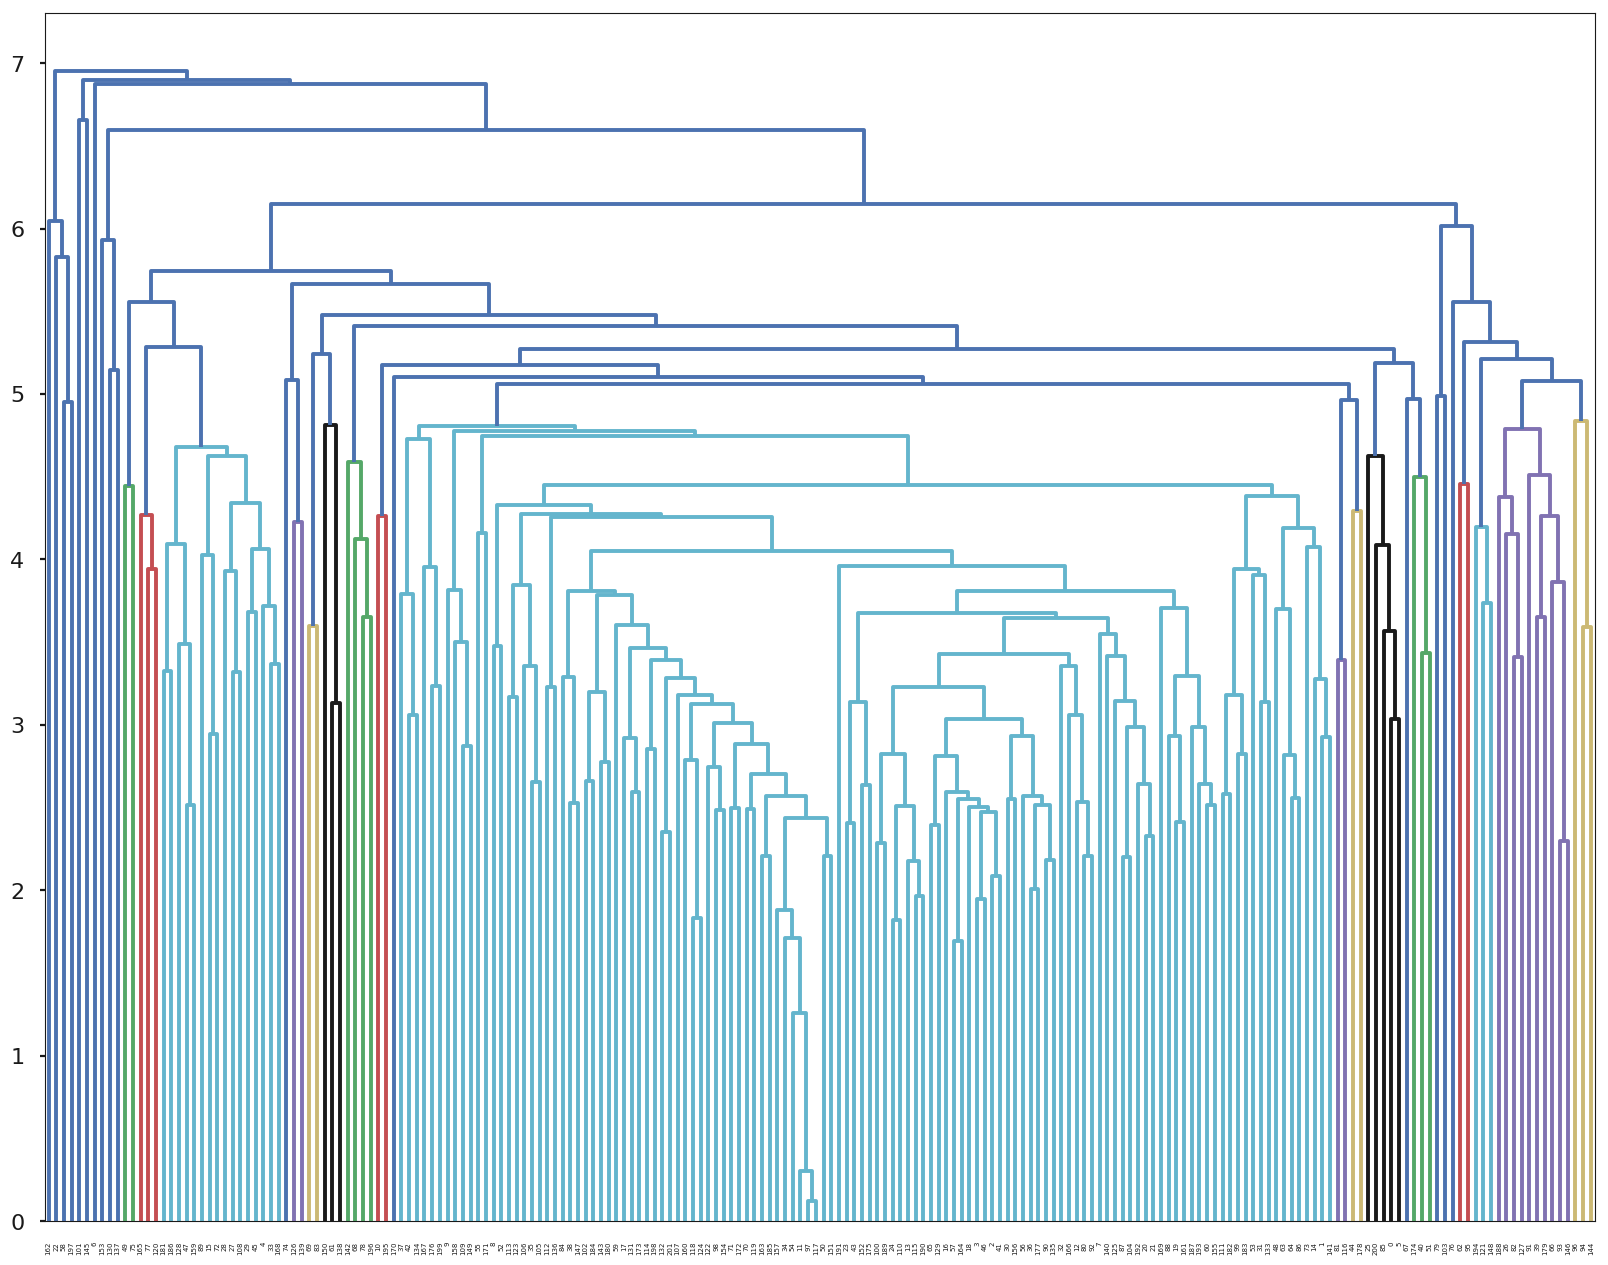

Hit Ratio:  0.558823529412





Recommendation info summary for :  Champaign
number of valid user:  71
number of valid test user:  71


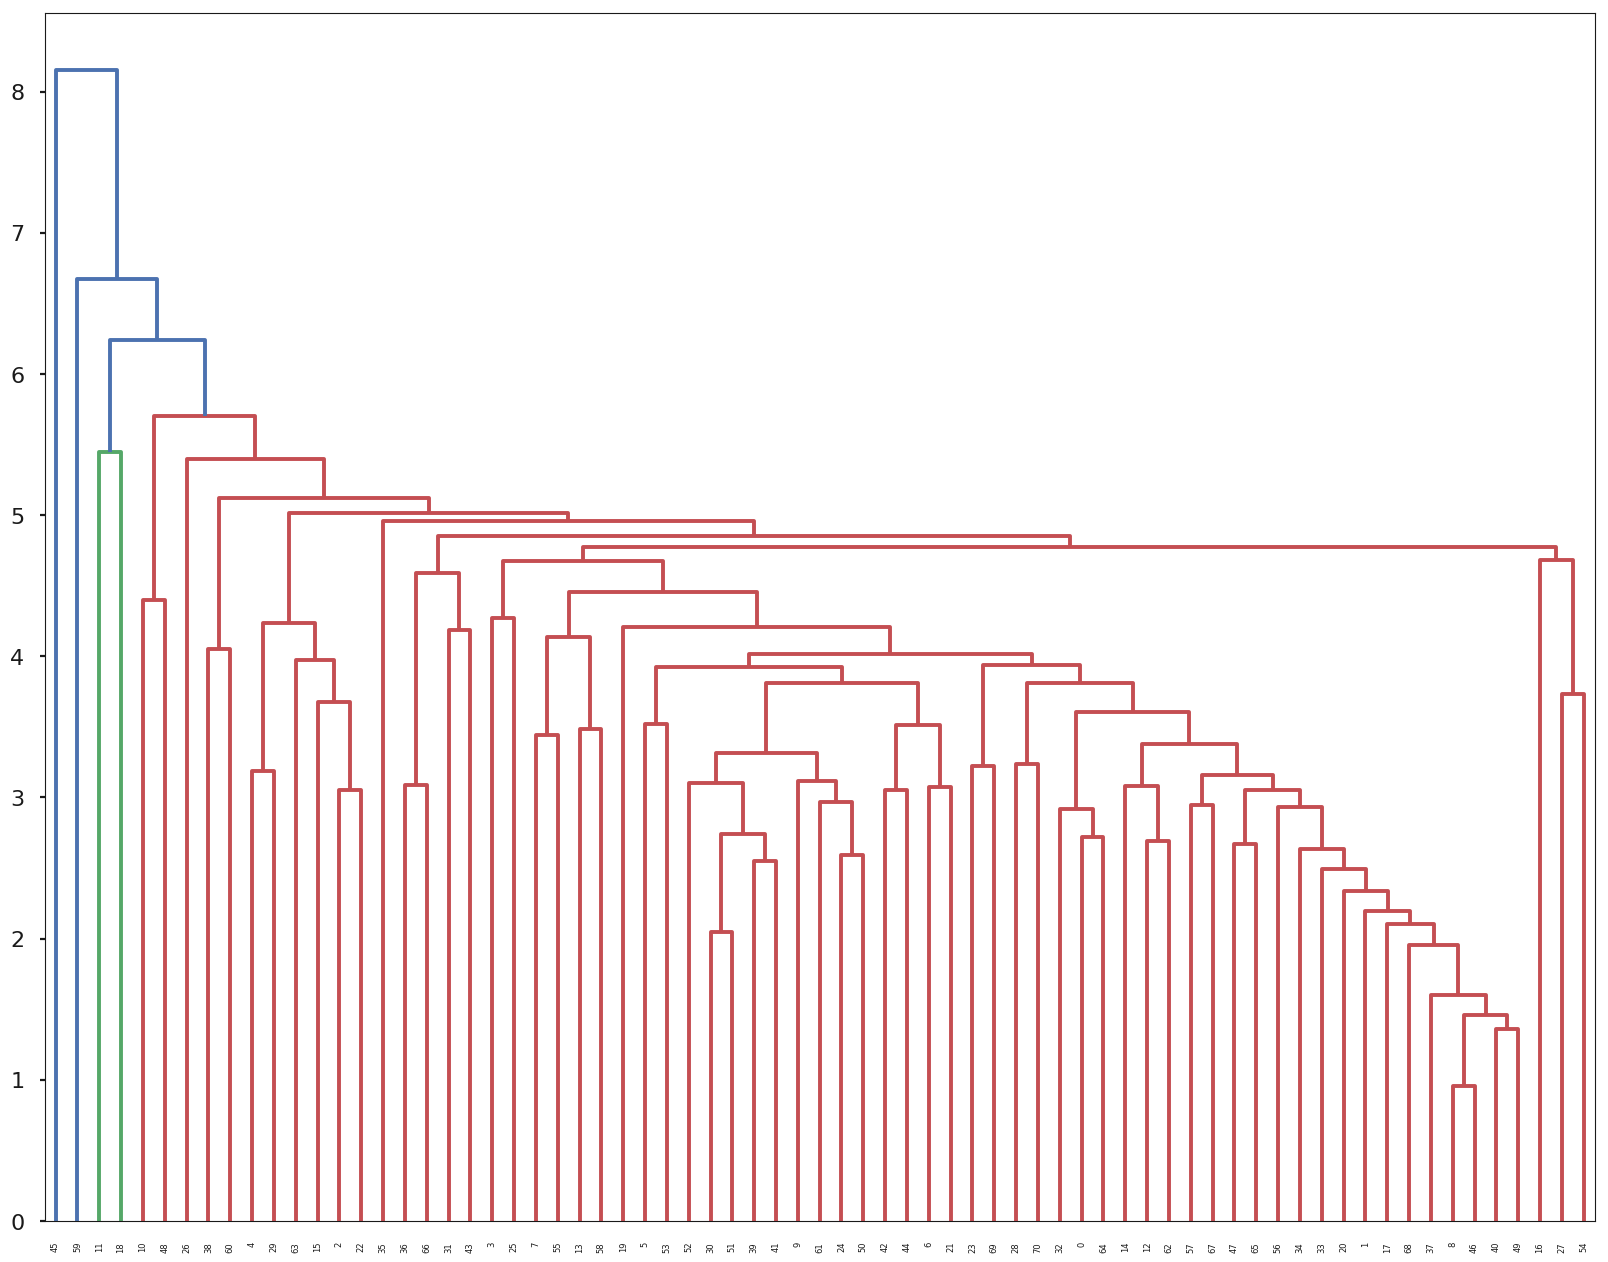

Hit Ratio:  0.384615384615





Recommendation info summary for :  Peoria
number of valid user:  44
number of valid test user:  44


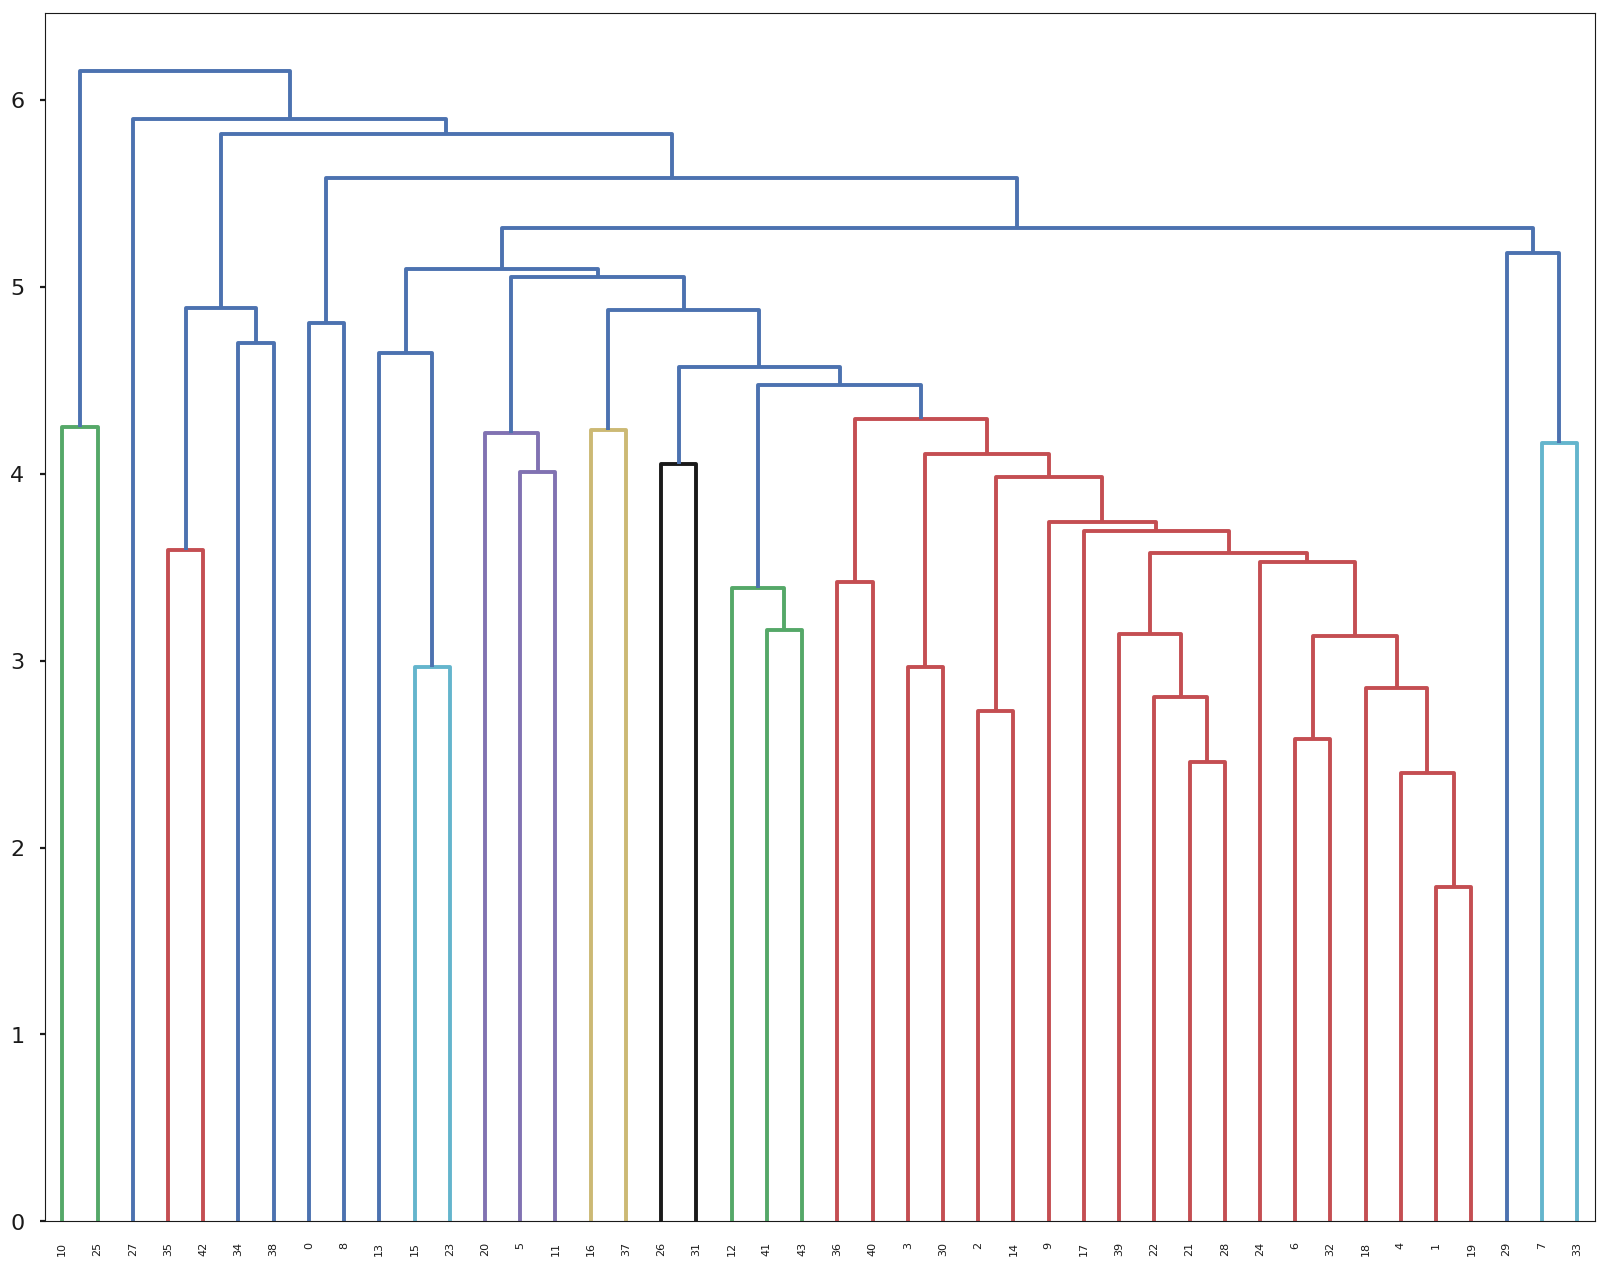

Hit Ratio:  0.777777777778







In [28]:
hr_list = []
for state in list_city[:20]:
    hr_list.append(recommend_based_on_state(state))

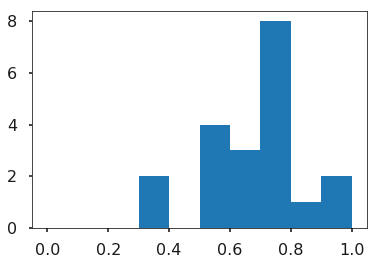

In [38]:
plt.hist(hr_list, bins=[x for x in np.arange(0,1.01,0.1)])
plt.show()